# Final Project
## Personal Bank Loan

Dataset : https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling

In this project, I aim to classify personal loans using the Thera-Bank dataset. With the majority of customers as depositors and a small number as borrowers, the bank intends to expand its borrower base to increase loan business and interest earnings. The goal is to convert liability customers into retail loan customers while retaining them as depositors. Based on the success of a previous campaign with a 9.6% conversion rate, the retail marketing department aims to enhance target marketing for improved success rates within a limited budget. The objective is to develop a classifier to identify potential loan customers, elevating success rates and reducing campaign costs.

# Introduction
Name : Garvin Makhris Mahendra

Batch : FTDS-020-RMT

Student : Hacktiv8


I am delighted to present my submission to the esteemed judges. My work encapsulates a comprehensive analysis and practical implementation of key concepts, bolstered by a commitment to detail and innovation. With a focus on meaningful insights and actionable outcomes, I invite the judges to explore the depth and value embedded in my submission.

# External Link
Provide the judges with external link needed such as Deployment link, Tableau/Data Studio Link, or any other link

Dataset : https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling

# Working Area
This is where you handle the task

Informasi pelanggan dan respons terhadap pinjaman pribadi:

1. ID: ID pelanggan

2. Age: Usia pelanggan dalam tahun-tahun yang diselesaikan

3. Experience: Jumlah pengalaman kerja dalam beberapa tahun

4. Income: Jumlah pendapatan tahunan (dalam ribuan)

5. Zipcode: Kode pos tempat tinggal klien

6. Family: Jumlah anggota keluarga

7. CCAvg: Pengeluaran bulanan rata-rata dengan kartu kredit (dalam ribuan)

8. Education: Tingkat pendidikan (1: sarjana, 2: magister, 3: lanjutan/profesional)

9. Mortgage: Nilai hipotek rumah, jika ada (dalam ribuan)

10. Securities Account: Apakah nasabah memiliki rekening efek di bank?

11. CD Account: Apakah pelanggan memiliki sertifikat rekening deposito (CD) dengan bank?

12. Online: Apakah nasabah menggunakan fasilitas internet banking?

13. CreditCard: Apakah nasabah menggunakan kartu kredit yang diterbitkan oleh bank?

14. Personal Loan: Apakah pelanggan ini menerima pinjaman pribadi yang ditawarkan di kampanye terakhir? (Variabel Sasaran)

Menggunakan model klasifikasi yang berbeda untuk memprediksi kemungkinan pelanggan akan membeli Personal Loan.

## Input Library

In [1]:
import numpy as np
import pandas as pd
import ydata_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.naive_bayes import ComplementNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from scipy import stats
from sklearn.base import clone
%matplotlib inline

## Data Loading dan Eksplorasi Data Analysis

In [24]:
data = pd.read_csv('D:\Data Science Hacktiv8\Phase 2\FinalProject\Bank_Personal_Loan_Modelling1.csv')
data.head(5)

id  age  experience  income  ZIP_code  family  CC_avg  education  mortgage  \
0   1   25           1      49     91107       4  160,00          1         0   
1   2   45          19      34     90089       3  150,00          1         0   
2   3   39          15      11     94720       1  100,00          1         0   
3   4   35           9     100     94112       1  270,00          2         0   
4   5   35           8      45     91330       4  100,00          2         0   

   personal_loan  securities_account  CD_account  online  credit_card  
0              0                   1           0       0            0  
1              0                   1           0       0            0  
2              0                   0           0       0            0  
3              0                   0           0       0            0  
4              0                   0           0       0            1

In [25]:
df = data.copy()

In [26]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- Overview: Statistik ringkas tentang jumlah entri, kolom, persentase nilai yang hilang, dan lainnya.
- Histograms: Visualisasi distribusi nilai pada setiap kolom.
- Correlations: Matriks korelasi antara kolom-kolom numerik.
- Missing Values: Informasi tentang nilai yang hilang dalam dataset.
- Unique Values: Jumlah nilai unik pada setiap kolom.
- Warnings: Peringatan atau masalah yang ditemukan dalam data, seperti kolom dengan variabilitas rendah atau identik.

**Result**
Dataset Information:
- Dataset ini berisi data dari 5000 pelanggan.
- Terdapat 14 variabel, termasuk 13 variabel independen dan 1 variabel dependen yaitu Personal Loan.
- Ada 6 variabel numerik: ID , Age , Experience , Income , CC_Avg , Mortgage.
- Ada 3 variabel kategorikal: Family , Education , Zip_Code.
- Ada 5 variabel Boolean: Personal_Loan , Securities Account , CD_Account , Online , Credit_Card.
- Tidak ada missing value dalam dataset.
- Tidak ada duplicates dalam dataset.
- Dataset mengandung nilai negatif untuk Variabel Experience.
- ID memiliki distribusi merata. Oleh karena itu, ID bertindak sebagai pengenal dan kurang memiliki informasi penting untuk model.
- ZIP Code berisi banyak kategori (467 kategori). Oleh karena itu, tampaknya informasi yang kurang signifikan untuk model kita.


Analisis Variabel Kategorikal:
- Education - Sekitar 42% pelamar memiliki gelar sarjana, 30% memiliki gelar magister, dan 28% adalah profesional.
- Family - Sekitar 29% dari ukuran keluarga pelanggan adalah 1, 26% adalah 2, 20% adalah 3, dan 24% adalah 4.


Analisis Variabel Boolean:
- Personal Loan - Sekitar 90% pelanggan tidak menerima tawaran pinjaman pribadi. Dataset ini tidak seimbang!
- CD Account - 94% pelanggan tidak memiliki akun CD dengan bank.
- CreditCard - Sekitar 71% pelanggan tidak menggunakan kartu kredit.
- Online - Sekitar 60% pelanggan menggunakan fasilitas perbankan internet.
- Securities Account - Sekitar 90% pelanggan tidak memiliki akun sekuritas dengan bank.


Analisis Variabel Numerik:
- Age - Usia rata-rata pelanggan adalah 45 dengan deviasi standar 11,5. Kurva histogram cukup simetris.
- CCAvg - Rata-rata pengeluaran kartu kredit per bulan adalah 1,94 dengan deviasi standar 1,75. Kurva sangat positif condong.
- Income - Pendapatan tahunan rata-rata pelanggan adalah 73,77 dengan deviasi standar 46. Kurva cukup positif condong.
- Mortgage - Nilai rata-rata hipotek rumah adalah 56,5 dengan deviasi standar 101,71! Kurva sangat positif condong (Skewness = 2,1) dan terdapat banyak outlier (Kurtosis = 4,76)


Seperti yang terlihat, ID memiliki distribusi merata. Nilai-nilai ID unik dan sebenarnya ID berfungsi sebagai pengenal dan kurang memiliki informasi berharga untuk model. Oleh karena itu, fitur ini dihapus.

In [64]:
df.drop('id', axis=1, inplace=True)

## Korelasi

In [65]:
# Define a colormap
royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
royalblue_r = royalblue.reversed()

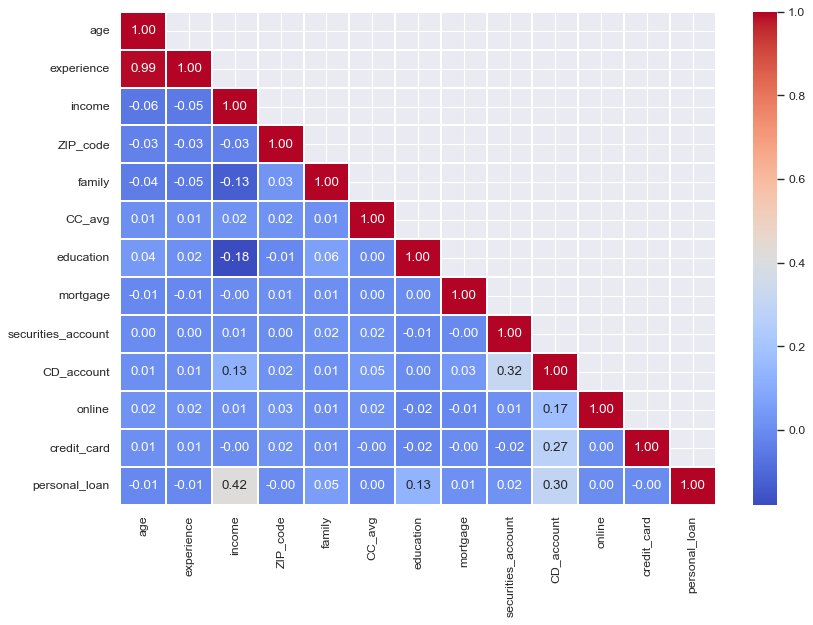

In [66]:
# Calculation of the Spearman correlation
target = 'personal_loan'
df_ordered = pd.concat([df.drop(target, axis=1), df[target]], axis=1)
corr = df_ordered.corr(method='spearman', numeric_only=True)

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(12, 8), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2)
plt.show()

Kesimpulan:
- Personal Loan sangat berkorelasi dengan Income, CD_Account, dan CCAvg.
- Experience sangat berkorelasi dengan Age. (ρ = 0,99)
CCAvg berkorelasi dengan Pendapatan sampai batas tertentu. (ρ = 0,58)

## Cleaning Data

melihat noise pada kolom ZIP Code

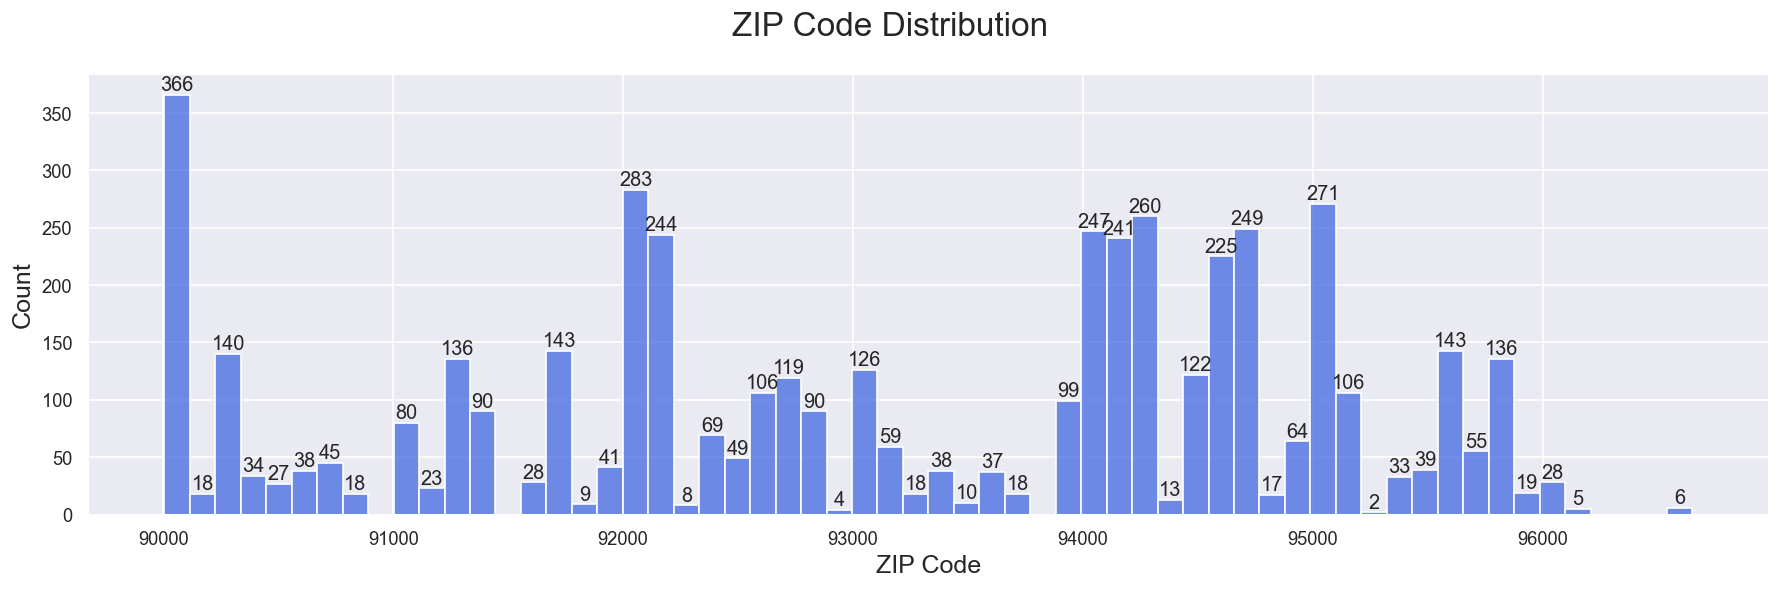

In [67]:
# Set the style of the graph
sns.set_style('darkgrid')
color = 'royalblue'

# Plot histogram
plt.figure(figsize=(15,5), dpi=120)
graph = sns.histplot(x='ZIP_code', data=df, bins=60, color=color)

# Show non-zero values of the individual bars
labels = [str(v) if v else '' for v in graph.containers[0].datavalues]
graph.bar_label(graph.containers[0], labels=labels)

plt.annotate('Noise', xy=(10000,60), xytext=(12000,400), color=color, fontsize=15,
             arrowprops=dict(facecolor=color, shrink=0.01))
plt.xlabel('ZIP Code', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.suptitle('ZIP Code Distribution', fontsize=20)
plt.tight_layout()
plt.show()

In [68]:
df[df['ZIP_code']<20000]

Empty DataFrame
Columns: [age, experience, income, ZIP_code, family, CC_avg, education, mortgage, personal_loan, securities_account, CD_account, online, credit_card]
Index: []

In [69]:
df.drop(df[df['ZIP_code']<20000].index, inplace=True)
df.reset_index(drop=True, inplace =True)

terdapat noise pada kolom ZIP Code, dan menghapus nilai tersebut

Melihat noise pada kolom Experience

In [70]:
df[df['experience']<0]['experience'].count()

0

In [71]:
df[df['experience']<0]['experience'].value_counts()

Series([], Name: count, dtype: int64)

nilai ini salah dicatat sebagai negatif dan menggantinya dengan nilai absolut:

In [72]:
df['experience'] = df['experience'].apply(abs)

## Handling Outline

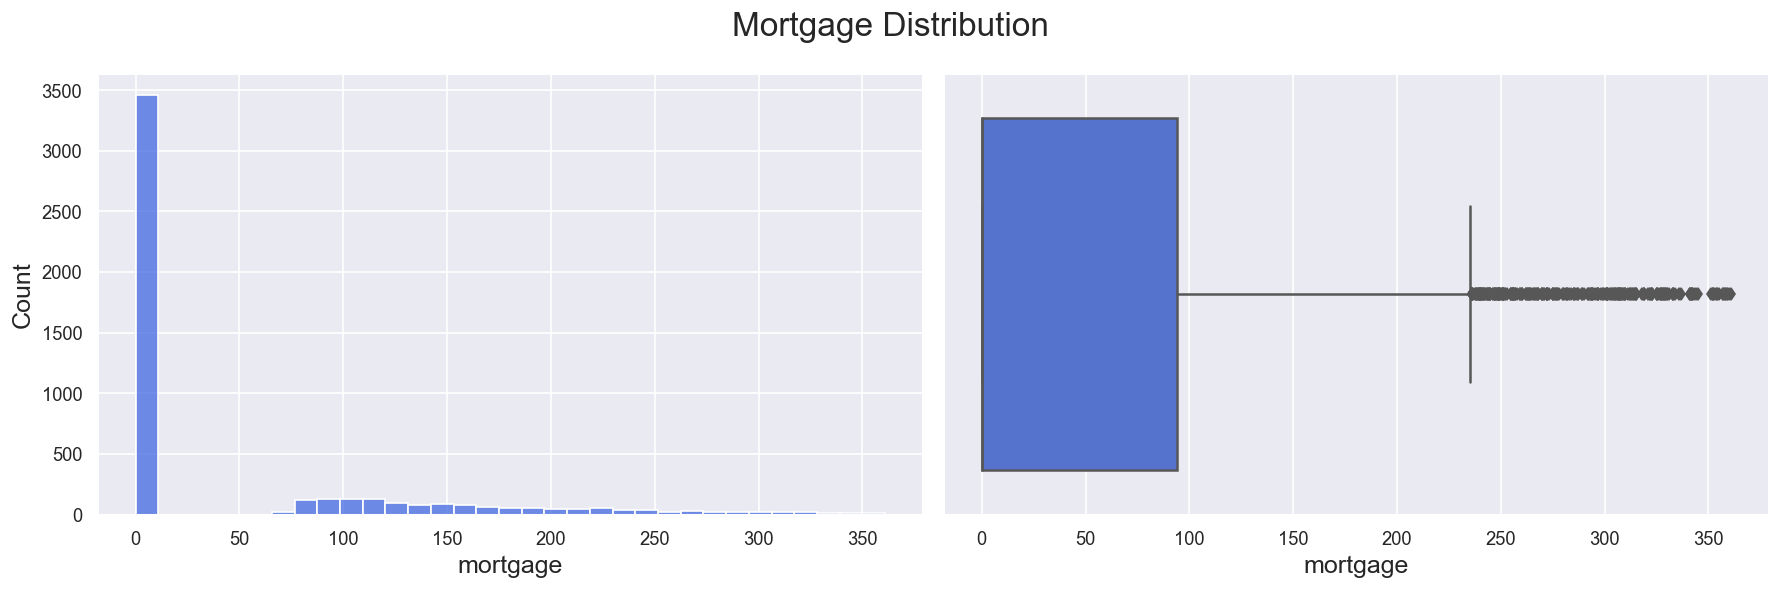

In [73]:
sns.set(rc = {'axes.labelsize' : 15})
fig, ax = plt.subplots(1, 2, figsize=(15,5), dpi=120)
sns.histplot(x='mortgage', data=df, color='royalblue', ax=ax[0])
sns.boxplot(x='mortgage', data=df, color='royalblue', ax=ax[1])
plt.suptitle('Mortgage Distribution', fontsize=20)
plt.tight_layout()
plt.show()

In [74]:
df[stats.zscore(df['mortgage'])>3]['mortgage'].count()

97

In [75]:
outlier_indexes = df[stats.zscore(df['mortgage'])>3].index
df.drop(outlier_indexes, inplace=True)
df.reset_index(drop=True, inplace=True)

Ditemukan 105 record dengan nilai Mortgage Z-score lebih besar dari 3. Oleh karena itu, 105 record ini sebagai outlier dan memfilter record ini dari kumpulan data.

## Feature Transformation

In [76]:
df['CC_avg'] = df['CC_avg']*12

## Handling Missing Value

Mengubah semua data pada kolom ke bentuk numerik

In [77]:
df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))

# errors='coerce' akan mengubah nilai yang tidak dapat diubah menjadi NaN

In [78]:
df.isnull().sum()

age                   0
experience            0
income                0
ZIP_code              0
family                0
CC_avg                0
education             0
mortgage              0
personal_loan         0
securities_account    0
CD_account            0
online                0
credit_card           0
dtype: int64

Terdapat banyak missing value, dikarenakan terlalu banyak missing value pada kolom CC_avg yang masih tergolong penting dalam train data ini maka saya menggunakan imputasi dengan kolom lainnya untuk mendapatkan pengganti data missing value pada kolom tersebut.

In [62]:
median_value = df['CC_avg'].mean()
df['CC_avg'].fillna(median_value, inplace=True)

In [63]:
df.isnull().sum()

id                    0
age                   0
experience            0
income                0
ZIP_code              0
family                0
CC_avg                0
education             0
mortgage              0
personal_loan         0
securities_account    0
CD_account            0
online                0
credit_card           0
dtype: int64

In [49]:
df.isnull().sum().sum()

0

Tidak terdapat missing value

In [79]:
df.sample(5)

age  experience  income  ZIP_code  family        CC_avg  education  \
2969   30           4      23     94122       4  4.606061e+24          2   
4694   45          20     201     92120       2  4.606061e+24          1   
887    55          30      32     91330       4  4.606061e+24          3   
1551   47          23      89     94920       1  4.606061e+24          2   
113    58          33      61     92833       2  4.606061e+24          3   

      mortgage  personal_loan  securities_account  CD_account  online  \
2969       121              0                   0           0       0   
4694         0              0                   0           0       1   
887          0              0                   1           0       0   
1551         0              0                   1           1       1   
113        193              0                   0           0       1   

      credit_card  
2969            0  
4694            1  
887             0  
1551            1  
113             0

## Duplicate Value

In [80]:
df[df.duplicated(keep=False)].sum().sum()

0.0

## Analisis Bivariat

Tujuan dari analisis ini adalah untuk memahami bagaimana perubahan dalam satu variabel berkaitan dengan perubahan dalam variabel lainnya. Analisis Bivariat dapat membantu mengidentifikasi korelasi, asosiasi, atau pola hubungan antara dua variabel dan dapat memberikan wawasan tentang bagaimana variabel-variabel tersebut saling mempengaruhi.

### Categorical Features vs Target

In [83]:
# Define a list containing the names of important categorical features in the dataset
Cat_Features = ['CD_account','education','family','securities_account','online','securities_account']

# Define the target name in a variable for simplicity
Target = 'personal_loan'

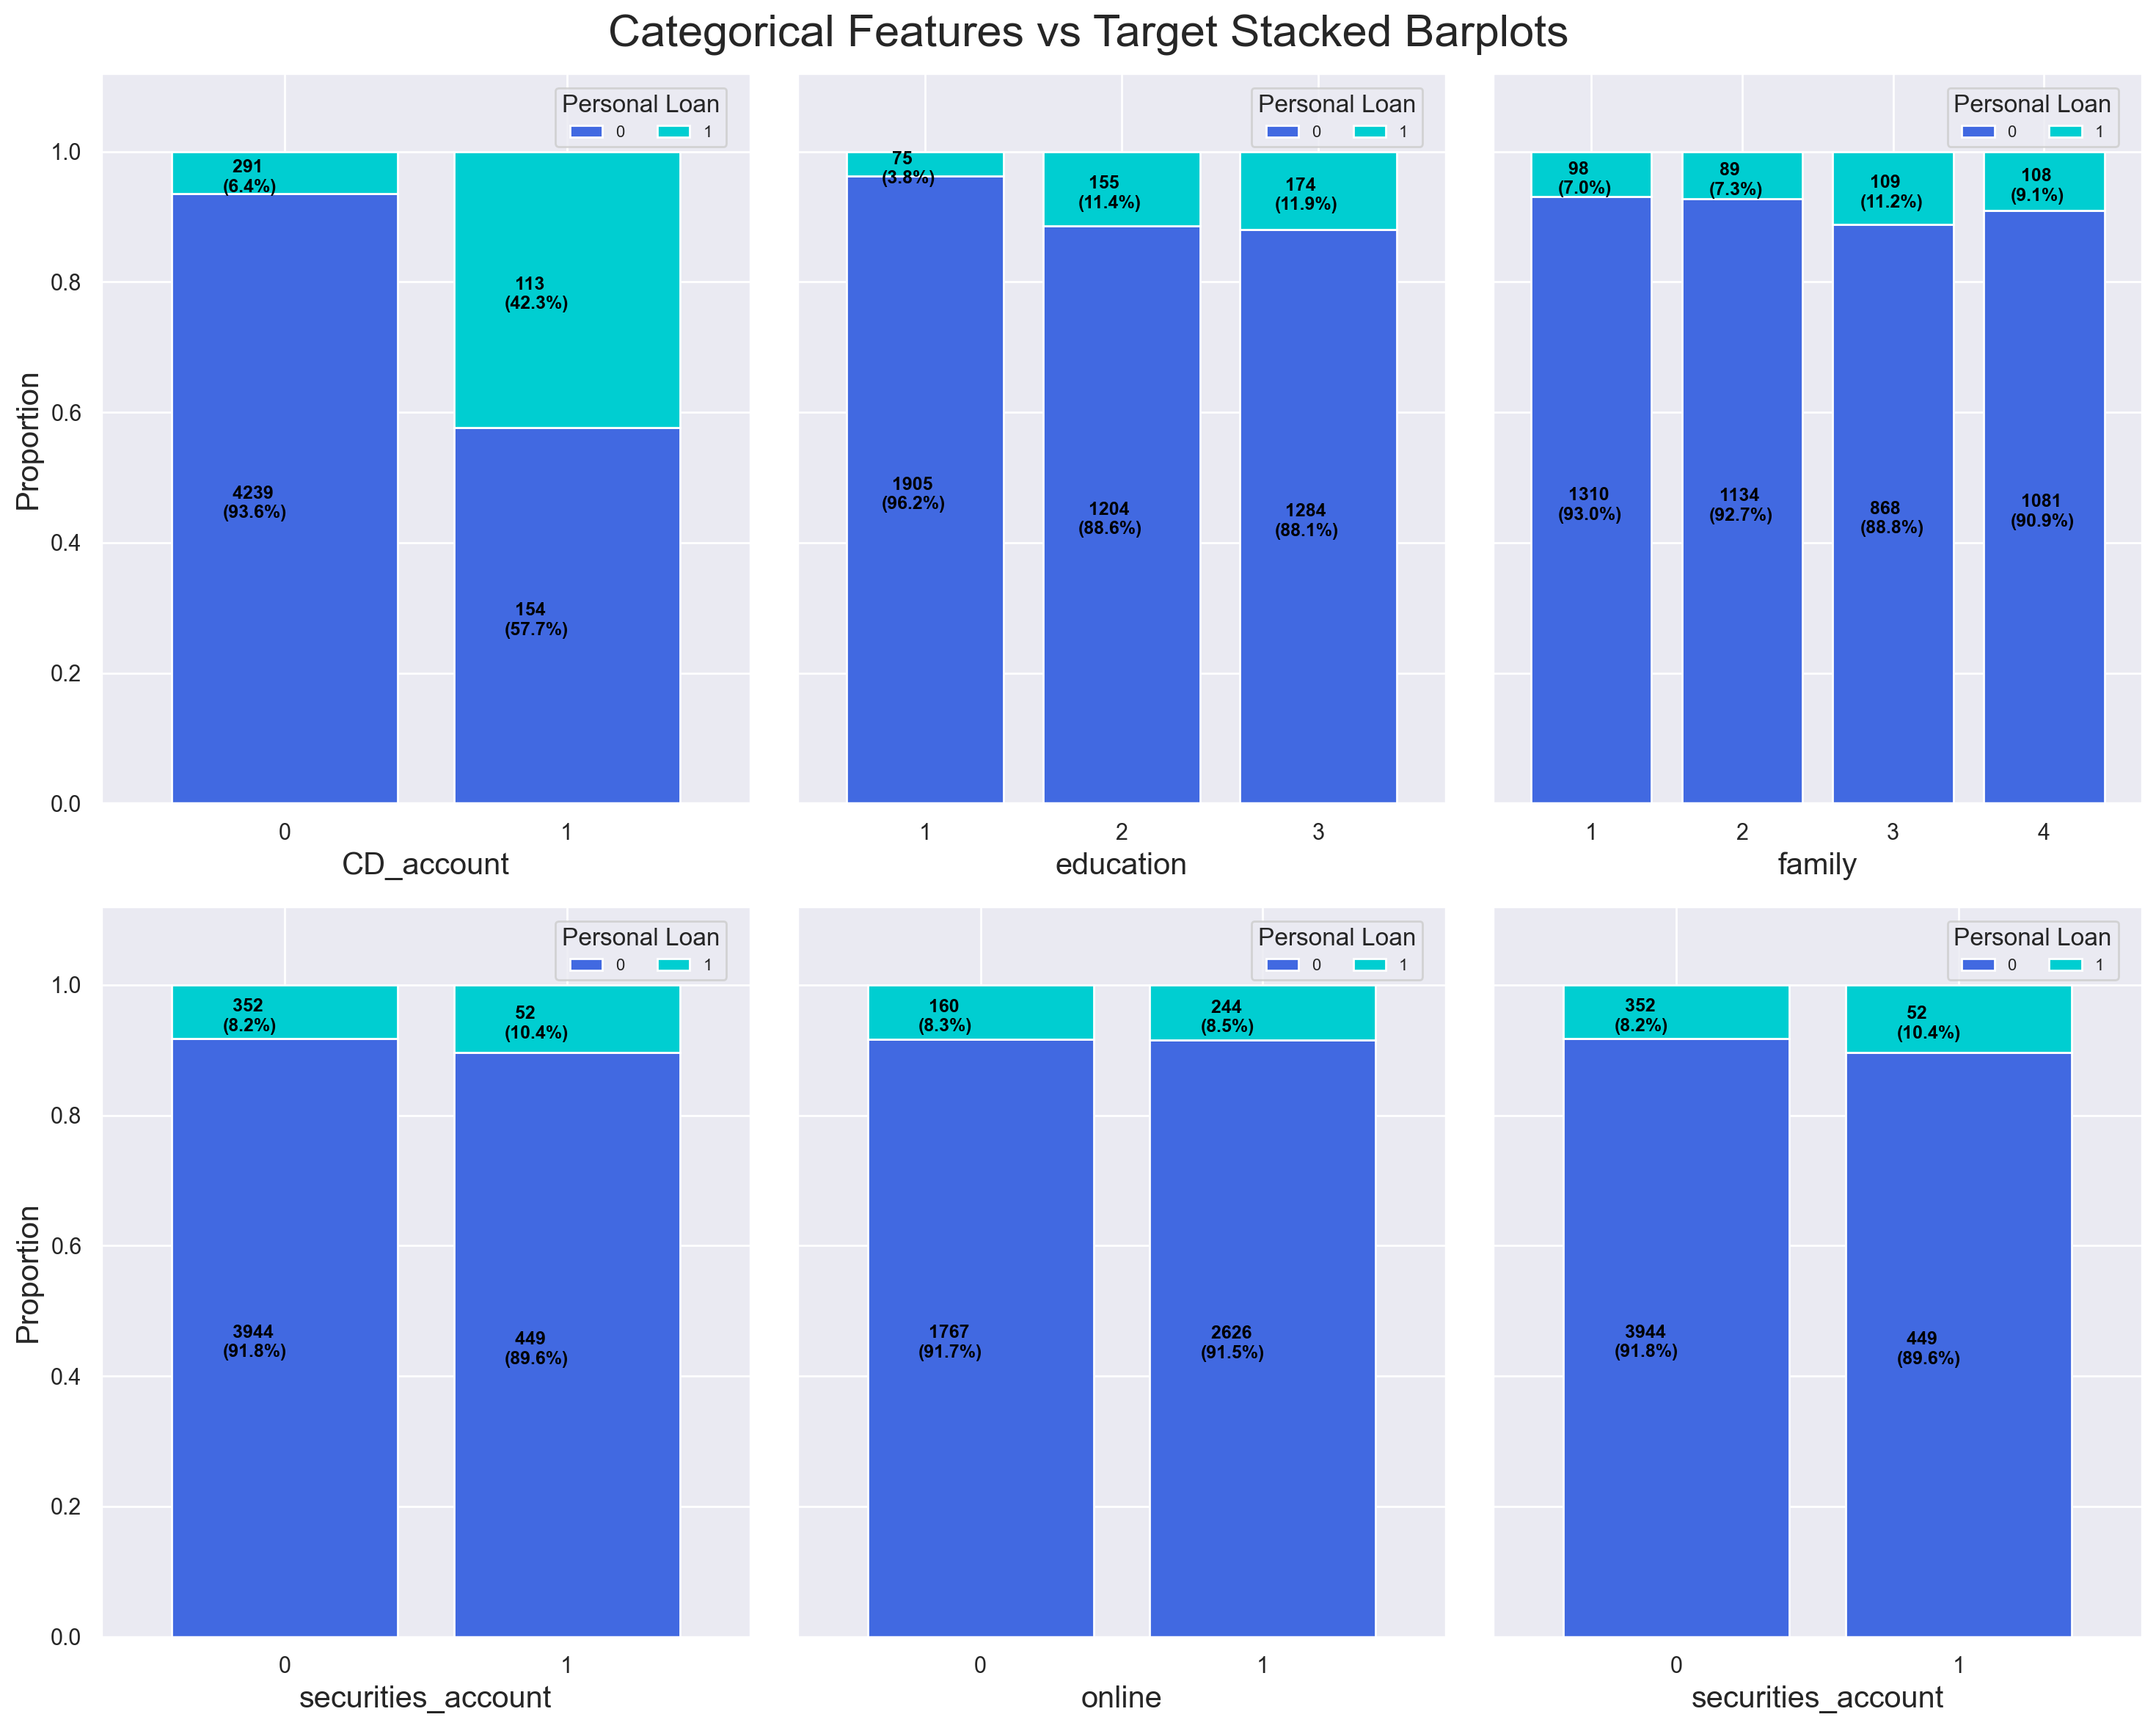

In [84]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,12), dpi=200)

for i,col in enumerate(Cat_Features):

    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df[Target])

    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df[Target], normalize='index')

    # Define colormap
    cmp = ListedColormap(['royalblue', 'darkturquoise'])

    # Plot stacked bar charts
    x, y = i//3, i%3
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)

    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.22, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'  {count}\n({np.round(proportion * 100, 1)}%)',
                         color = "black", fontsize=9, fontweight="bold")

    # Add legend
    ax[x,y].legend(title='Personal Loan', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)


plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()

Kesimpulan:
- Pelanggan yang memiliki sertifikat deposito (CD) dengan bank cenderung membeli personal loan dari bank.

- Pelanggan dengan tingkat pendidikan yang lebih tinggi cenderung lebih mungkin membeli personal loan.

- Jumlah anggota keluarga tidak memiliki pengaruh yang signifikan terhadap probabilitas membeli personal loan.

- Pelanggan yang memiliki atau tidak memiliki akun sekuritas di bank tidak memiliki pengaruh terhadap probabilitas membeli personal loan.

- Pelanggan yang menggunakan atau tidak menggunakan perbankan internet tidak tampak memiliki pengaruh terhadap probabilitas membeli personal loan.

- Pelanggan yang menggunakan atau tidak menggunakan kartu kredit tidak tampak memiliki dampak pada kemungkinan membeli personal loan.

### Numerical Features vs Target

In [85]:
# Daftar yang berisi nama-nama fitur numerik penting dalam dataset
Num_Features = ['CC_avg','income','mortgage','age','experience']

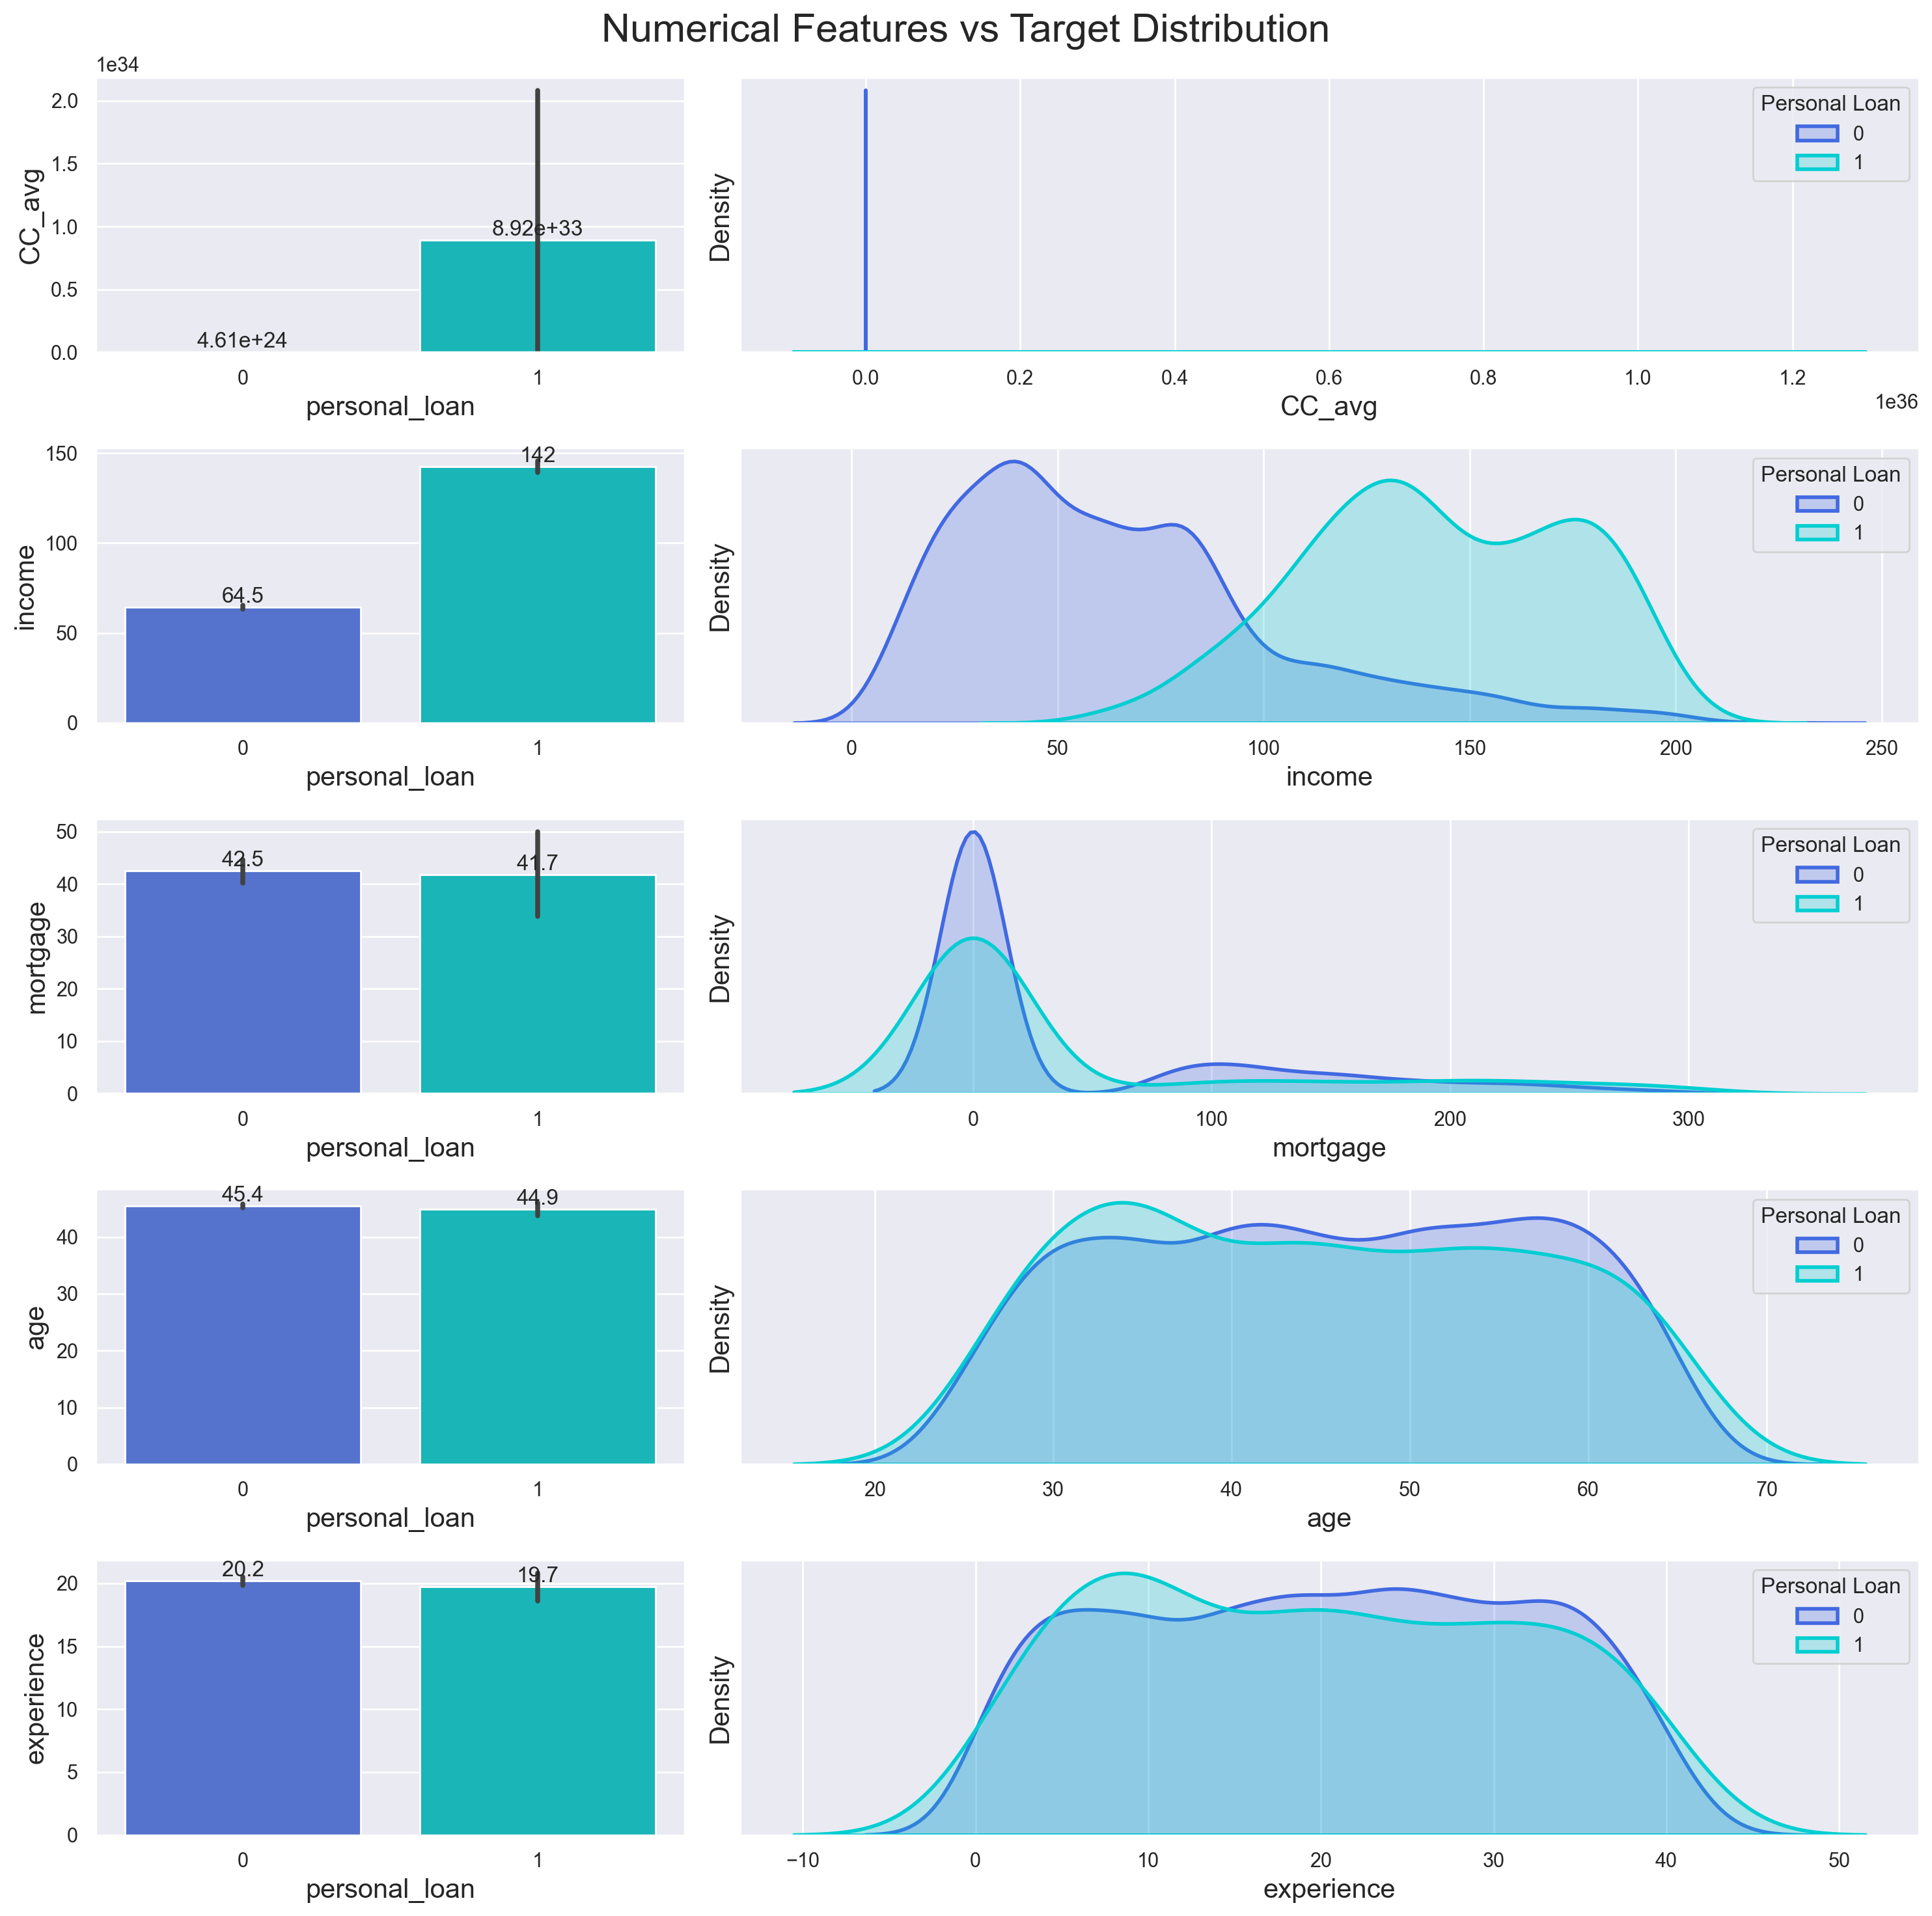

In [86]:
sns.set_palette(['royalblue', 'darkturquoise'])

fig, ax = plt.subplots(5, 2, figsize=(15, 15), dpi=200, gridspec_kw={'width_ratios': [1, 2]})

for i, col in enumerate(Num_Features):
    # barplot
    graph = sns.barplot(data=df, x=Target, y=col, ax=ax[i, 0])

    # Check if 'col' is a numeric variable
    if df[col].dtype in ['int64', 'float64']:
        # kde Plot
        sns.kdeplot(data=df[df[Target] == 0], x=col, fill=True, linewidth=2, ax=ax[i, 1], label='0')
        sns.kdeplot(data=df[df[Target] == 1], x=col, fill=True, linewidth=2, ax=ax[i, 1], label='1')
        ax[i, 1].set_yticks([])
        ax[i, 1].legend(title='Personal Loan', loc='upper right')

    # Add bar sizes to our plot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='%.3g')

plt.suptitle('Numerical Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()

Kesimpulan:
- Pelanggan yang membelanjakan lebih banyak untuk kartu kredit lebih cenderung mengambil personal loan.

- Pelanggan dengan pendapatan tinggi lebih cenderung membeli personal loan.

- Pelanggan dengan nilai hipotek tinggi lebih cenderung membeli personal loan.

- Usia nasabah tidak berpengaruh terhadap probabilitas pembelian personal loan.

- Pengaruh jumlah pengalaman kerja terhadap pembelian pinjaman serupa dengan usia nasabah. Distribusi Pengalaman sangat mirip dengan distribusi Usia, karena Pengalaman berkorelasi kuat dengan Usia.

Oleh karena itu, kami menghapus Experience karena tidak memberikan informasi lebih dari Usia:

In [87]:
df.drop('experience', axis=1, inplace=True)

### Imbalance dataset

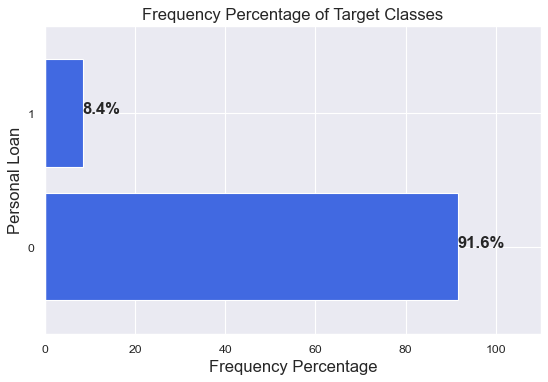

In [88]:
plt.figure(dpi=80)

# Plot frequency percentages barplot
df['personal_loan'].value_counts(normalize=True).mul(100).plot(kind='barh', width=0.8, figsize=(8,5))

# Add frequency percentages to the plot
labels = df['personal_loan'].value_counts(normalize=True).mul(100).round(1)
for i in labels.index:
    plt.text(labels[i], i, str(labels[i])+ '%', fontsize=15, weight='bold')

plt.xlim([0, 110])
plt.xlabel('Frequency Percentage', fontsize=15)
plt.ylabel('Personal Loan', fontsize=15)
plt.title('Frequency Percentage of Target Classes', fontsize=15)
plt.show()

- Kumpulan data yang tidak seimbang dapat menyebabkan algoritme yang bias terhadap kelas mayoritas. Ini berarti bahwa algoritma klasifikasi apa pun yang dilatih pada kumpulan data yang tidak seimbang sering kali secara tidak akurat mengklasifikasikan kelas minoritas sebagai kelas mayoritas.
- Performa model pembelajaran mesin bisa menjadi sangat miring saat diisi dengan data yang tidak seimbang. Misalnya, jika dataset kita memiliki 91,2% kelas 0 dan 8,8% kelas 1, maka model pembelajaran dapat dengan mudah dioptimalkan untuk hanya memprediksi semua masukan tes sebagai milik kelas 0 dan tetap mendapatkan akurasi 91,2%!
- Jika model dilatih pada data yang sangat tidak seimbang, model tersebut dapat mengembangkan pemahaman yang salah tentang tren yang mendasari data. Model mungkin tidak dapat mengenali bagaimana nilai-nilai tertentu didistribusikan di antara kelas-kelas yang berbeda atau bahkan bagaimana kelas-kelas tertentu saling tumpang tindih.

### Train Test Split

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split dataset into features (X) and target (y)
X = df.drop('personal_loan', axis=1)
y = df['personal_loan']

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Scale the training and test data using the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [90]:
X = df.drop('personal_loan', axis=1)
y = df['personal_loan']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

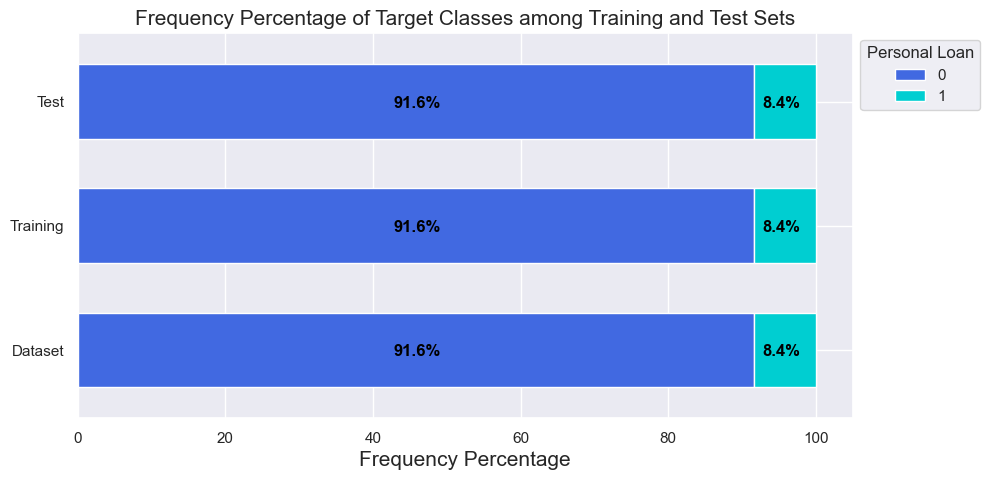

In [92]:
# Define a dataframe containing frequency percentages
df_perc = pd.concat([y.value_counts(normalize=True).mul(100).round(1),
                     y_train.value_counts(normalize=True).mul(100).round(1),
                     y_test.value_counts(normalize=True).mul(100).round(1)], axis=1)
df_perc.columns=['Dataset','Training','Test']
df_perc = df_perc.T

# Plot frequency percentages barplot
df_perc.plot(kind='barh', stacked=True, figsize=(10,5), width=0.6)

# Add the percentages to our plot
for idx, val in enumerate([*df_perc.index.values]):
    for (percentage, y_location) in zip(df_perc.loc[val], df_perc.loc[val].cumsum()):
        plt.text(x=(y_location - percentage) + (percentage / 2)-3,
                 y=idx - 0.05,
                 s=f'{percentage}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.legend(title='Personal Loan', loc=(1.01,0.8))
plt.xlabel('Frequency Percentage', fontsize=15)
plt.title('Frequency Percentage of Target Classes among Training and Test Sets', fontsize=15)
plt.show()

Seperti dapat dilihat, sampel dibagi secara acak sehingga persentase setiap kelas tetap konstan antara training dan tes.

### Drop-column Feature Importance Implementation

In [93]:
# Define a scorer function
def f1_metric(model, X_train, y_train):
    '''
    This function reports f1-score metric for the class specified by 'Positive Label' (or '1')
    '''
    return f1_score(y_train, model.predict(X_train), average='binary')

Drop-column Feature Importance:

In [94]:
def drop_column_importance(model, X_train, y_train, random_state=0):
    # list containing feature importances
    importances = []
    # Clone the model
    model_clone = clone(model)
    # Set random_state for comparability
    model_clone.random_state = random_state
    # Train the model
    model_clone.fit(X_train, y_train)
    # Create the cross-validation object using StratifiedKFold
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    # Score the benchmark model using cross-validation
    benchmark_score = cross_val_score(model_clone, X_train, y_train, cv=cv, scoring=f1_metric).mean()


    # Iterate over all features and store feature importance
    for col in X_train.columns:
        # Clone the model
        model_clone = clone(model)
        # Set random_state for comparability
        model_clone.random_state = random_state
        # Traint the model on the the dataset with a single feature removed
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        # Score the droped-column model
        drop_column_score = cross_val_score(model_clone, X_train.drop(col,axis=1), y_train, cv=cv, scoring=f1_metric).mean()
        # Store feature importance which is defined as the difference between the benchmark and the new model score
        importances.append(benchmark_score - drop_column_score)

    # Return the features along with their importances in the form of a dataframe
    importances_df = pd.DataFrame({'feature': X_train.columns, 'feature importance': importances}) \
                     .sort_values('feature importance', ascending = False).reset_index(drop = True)

    return importances_df

Menentukan fungsi untuk memvisualisasikan hasil teknik Drop-column Feature Importance menggunakan diagram batang:

In [95]:
def drop_column_importance_plot(model, X_train, y_train):
    # Call drop-column feature importance function
    df_drop_column = drop_column_importance(model, X_train, y_train, random_state=0)
    # Rename columns
    df_drop_column.columns = ['Feature', 'Feature Importance']

    # Plot barchart
    plt.figure(figsize=(12,10))
    sns.barplot(data=df_drop_column, x='Feature Importance', y='Feature', orient='h', color='royalblue')
    plt.title('Drop Column Feature Importance', fontsize=20)
    plt.show()

Selanjutnya, akan menggunakan fungsi-fungsi ini sebelum membangun model akhir, mengenai setiap algoritma klasifikasi untuk mendeteksi fitur yang berlebihan.

### tune clf hyperparameters

Fungsi tune_clf_hyperparameters adalah untuk melakukan (tuning) pada hiperparameter dari model klasifikasi yang diberikan. Proses penalaan hiperparameter adalah upaya untuk menemukan kombinasi hiperparameter yang memberikan kinerja terbaik pada model, sehingga dapat menghasilkan prediksi yang akurat.

In [97]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train):

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=f1_metric, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    print("Best hyperparameters:\n", clf_grid.best_params_)

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_

## Naive Bayes Model Building

### Complement NB

In [38]:
def discretization_report(df, clf):
    '''
    This function finds the optimal combination of n_bins and strategy for continuous features discretization
    '''
    # Clean values in columns with thousands format using commas
    df['CC_avg'] = df['CC_avg'].str.replace(',', '').astype(float)
    df['mortgage'] = df['mortgage'].str.replace(',', '').astype(float)

    # Rest of the code remains the same
    # ...


In [39]:
def discretization_report(df, clf):
    '''
    This function finds the optimal combination of n_bins and strategy for continuous features discretization
    '''
    # Define continuous features to perform discretization on
    cols_to_discretize = ['age', 'income', 'CC_avg', 'mortgage']

    # Define the features (X) and the output labels (y)
    X = df[cols_to_discretize]
    y = df['personal_loan']

    # Split dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

    # Define the grid search parameters
    param_grid = {'discretizer__strategy': ['uniform', 'quantile', 'kmeans'],
                  'discretizer__n_bins': np.arange(2,11)}

    # Define the KBinsDiscretizer and OneHotEncoder and ComplementNB objects
    discretizer = KBinsDiscretizer(encode='ordinal')
    onehot = OneHotEncoder(handle_unknown='ignore', drop='first')

    # Create the pipeline
    pipeline = Pipeline([('discretizer', discretizer), ('onehot', onehot), ('clf', clf)])

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1')

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Print the best parameters and the best score
    print("Best discretization parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

    # Return optimal values for n_bins and strategy
    return grid_search.best_params_['discretizer__n_bins'], grid_search.best_params_['discretizer__strategy']

In [40]:
# Ignore a warning that in some cases, the width of the bins will be too small
warnings.simplefilter(action='ignore')

# Initialize the CNB classifier
cnb = ComplementNB()

# Call discretization_report
n_bins, strategy = discretization_report(df, cnb)

Best discretization parameters: {'discretizer__n_bins': 10, 'discretizer__strategy': 'kmeans'}
Best score: 0.7470095538553044


###  Complement NB Feature Encoding

In [41]:
def nb_feature_encoding(df, n_bins, strategy, cols_to_encode):
    '''
    This function performs dummy encoding on the desired categorical features after performing feature discretization
    considering optimal n_bins and strategy values.
    '''
    # Define continuous features to perform discretization on
    cols_to_discretize = ['age', 'income', 'CC_avg', 'mortgage']

    # Define the features (X) and the output labels (y)
    X = df.drop('personal_loan', axis=1)
    y = df['personal_loan']

    # Split dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

    # Discretize the continuous features
    discretizer = KBinsDiscretizer(n_bins=n_bins, strategy=strategy, encode='ordinal')
    X_train[cols_to_discretize] = discretizer.fit_transform(X_train[cols_to_discretize])
    X_test[cols_to_discretize] = discretizer.transform(X_test[cols_to_discretize])

    # Onehot encode the discretized features
    X_train = pd.get_dummies(X_train, columns=cols_to_encode, drop_first=True)
    X_test = pd.get_dummies(X_test, columns=cols_to_encode, drop_first=True)

    # Align the columns of the test set with the training set
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

    # Return transformed features
    return X_train, X_test

In [42]:
# All non-binary features are selected for onehot encoding
cols_to_encode = ['age', 'income', 'CC_avg', 'mortgage', 'family', 'education']

# Call nb_feature_encoding
X_train, X_test = nb_feature_encoding(df, n_bins, strategy, cols_to_encode)

### Feature Subset Selection

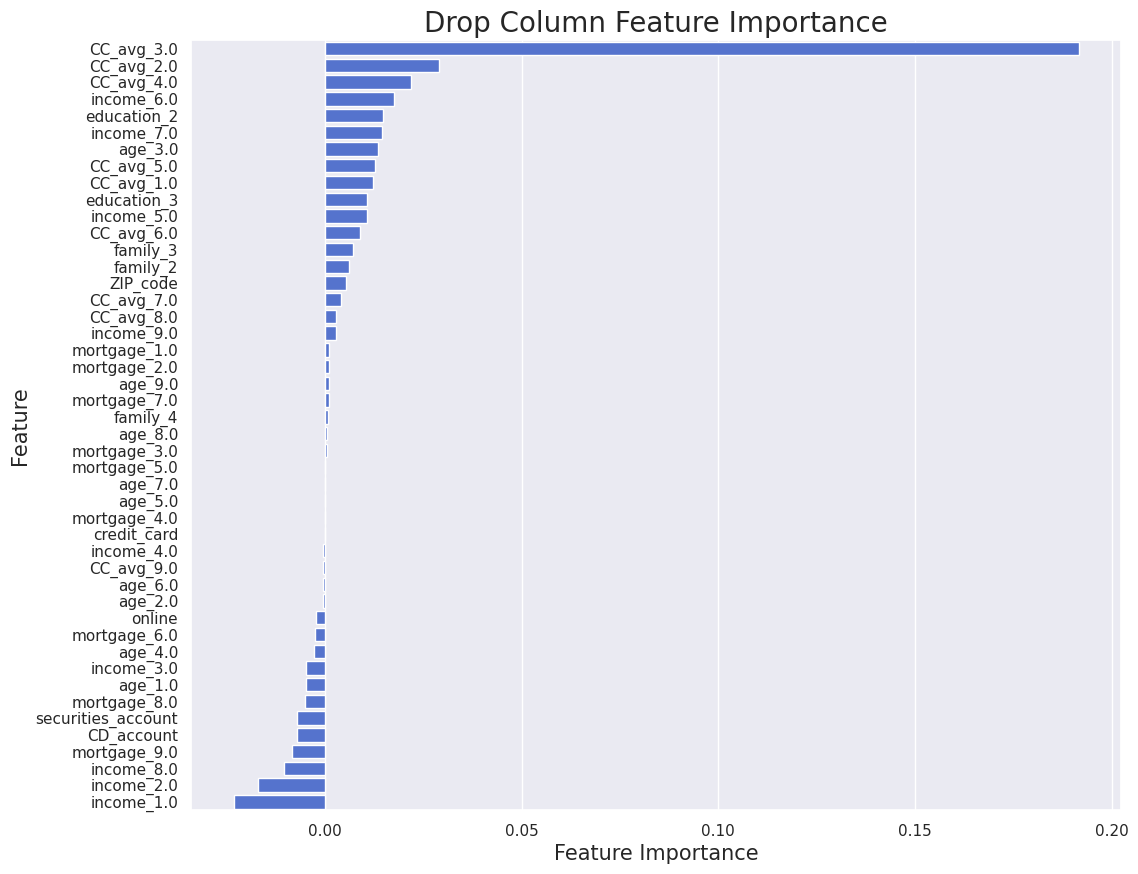

In [43]:
# Initialize the CNB classifier
cnb = ComplementNB()

# Call drop_column_importance_plot
drop_column_importance_plot(cnb, X_train, y_train)

filter dataset

In [44]:
feature_importances = drop_column_importance(cnb, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0]['feature']

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

### Model Building

In [45]:
cnb = ComplementNB()
cnb.fit(X_train, y_train)

ComplementNB()

###  Model Evaluation

In [108]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='binary'),
                                recall_score(y_test, y_pred, average='binary'),
                                f1_score(y_test, y_pred, average='binary'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])],
                          index=['Accuracy','Precision','Recall','F1-score','AUC'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

In [105]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports,
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))

    # Create figure and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    # Plot ROC curve for test data and display AUC score
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')

    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show()


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3569
           1       0.97      0.84      0.90       346

    accuracy                           0.98      3915
   macro avg       0.98      0.92      0.95      3915
weighted avg       0.98      0.98      0.98      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       892
           1       0.97      0.83      0.89        87

    accuracy                           0.98       979
   macro avg       0.98      0.91      0.94       979
weighted avg       0.98      0.98      0.98       979



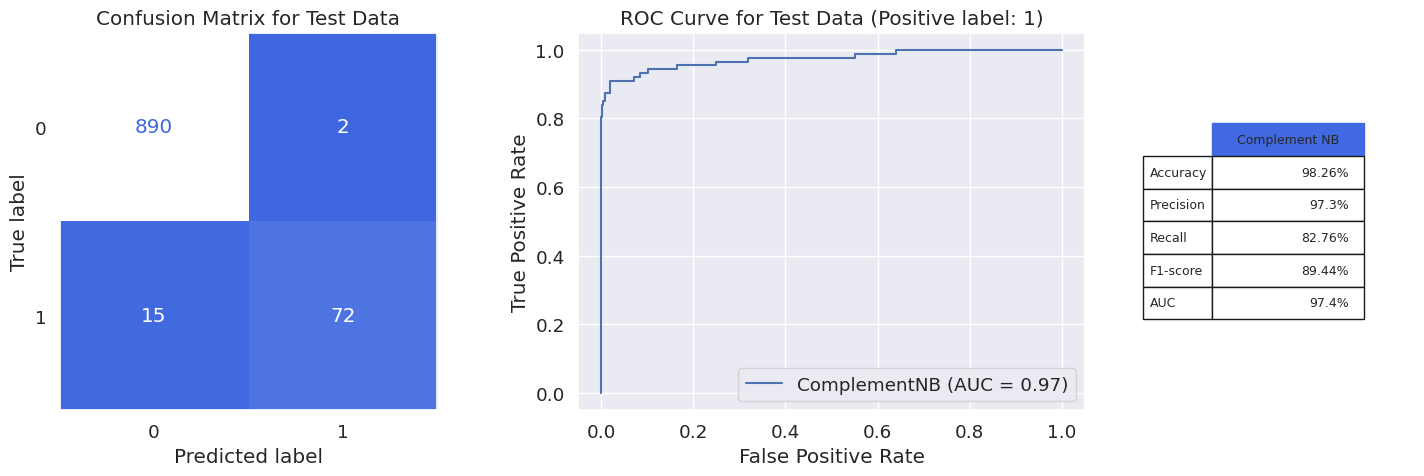

In [48]:
model_evaluation(cnb, X_train, X_test, y_train, y_test, 'Complement NB')

Mendapat skor recall sekitar 94% dari Complement NB, yang bagus, tetapi karena nilai precision rendah yaitu 38%, dan skor f1 sekitar 54%.

In [49]:
# Save the final performance of Complement Naive Bayes classifier
cnb_result = metrics_calculator(cnb, X_test, y_test, 'Complement Naive Bayes')

## Bernoulli NB Model Building

In [50]:
# Initialize the Categorical NB classifier
bnb = BernoulliNB()

# Call discretization_report
n_bins, strategy = discretization_report(df, bnb)

Best discretization parameters: {'discretizer__n_bins': 10, 'discretizer__strategy': 'kmeans'}
Best score: 0.9101220962764269


### Feature Encoding

In [51]:
df_bnb = df.copy()
df_bnb.drop('ZIP_code', axis=1, inplace=True)

In [52]:
# All non-binary features are selected for onehot encoding
cols_to_encode = ['age', 'income', 'CC_avg', 'mortgage', 'family', 'education']

# Call nb_feature_encoding
X_train, X_test = nb_feature_encoding(df_bnb, n_bins, strategy, cols_to_encode)

### Feature Subset Selection

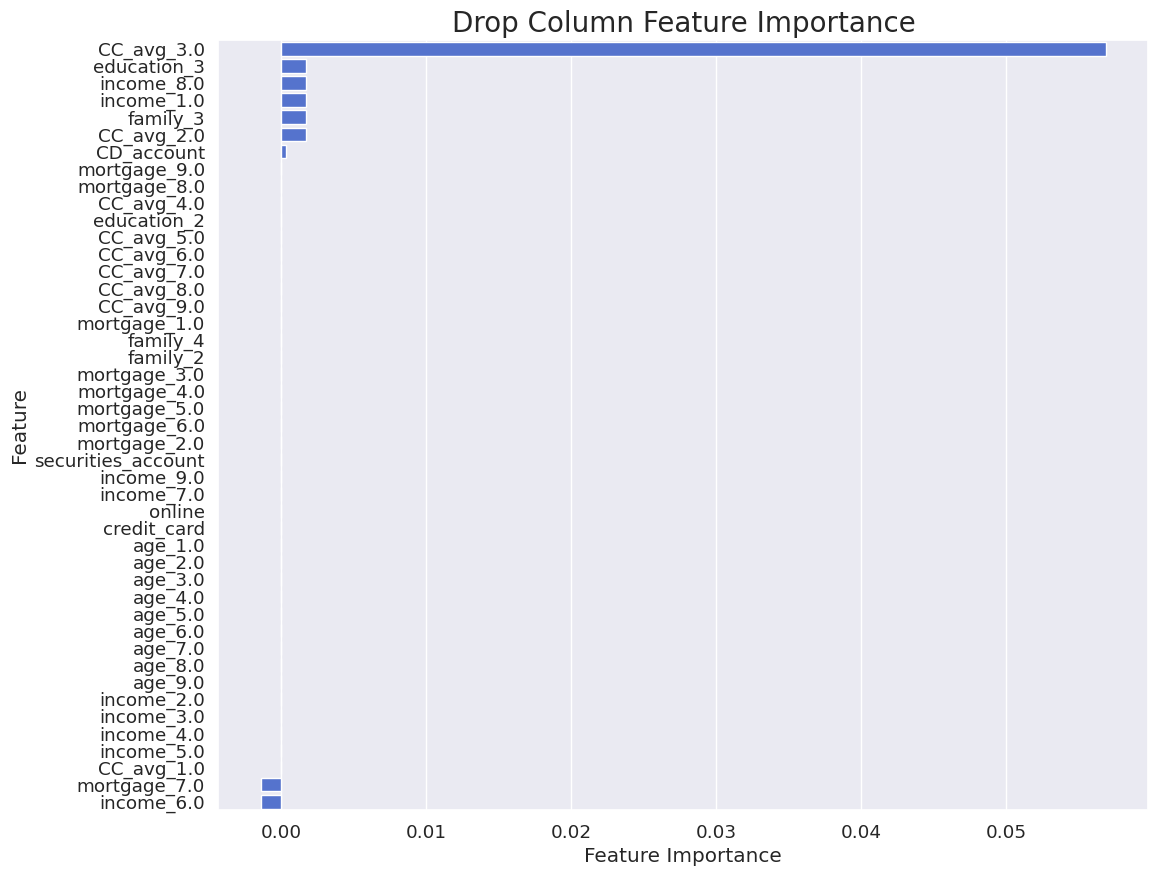

In [53]:
# Initialize the BNB classifier
bnb = BernoulliNB()

# Call drop_column_importance_plot
drop_column_importance_plot(bnb, X_train, y_train)

filter dataset

In [54]:
# Find Important features with positive feature_importance value
feature_importances = drop_column_importance(bnb, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0]['feature']

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

### Model Building

In [55]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

### Model Evaluation


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3569
           1       1.00      0.85      0.92       346

    accuracy                           0.99      3915
   macro avg       0.99      0.92      0.95      3915
weighted avg       0.99      0.99      0.99      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       892
           1       0.99      0.84      0.91        87

    accuracy                           0.98       979
   macro avg       0.99      0.92      0.95       979
weighted avg       0.98      0.98      0.98       979



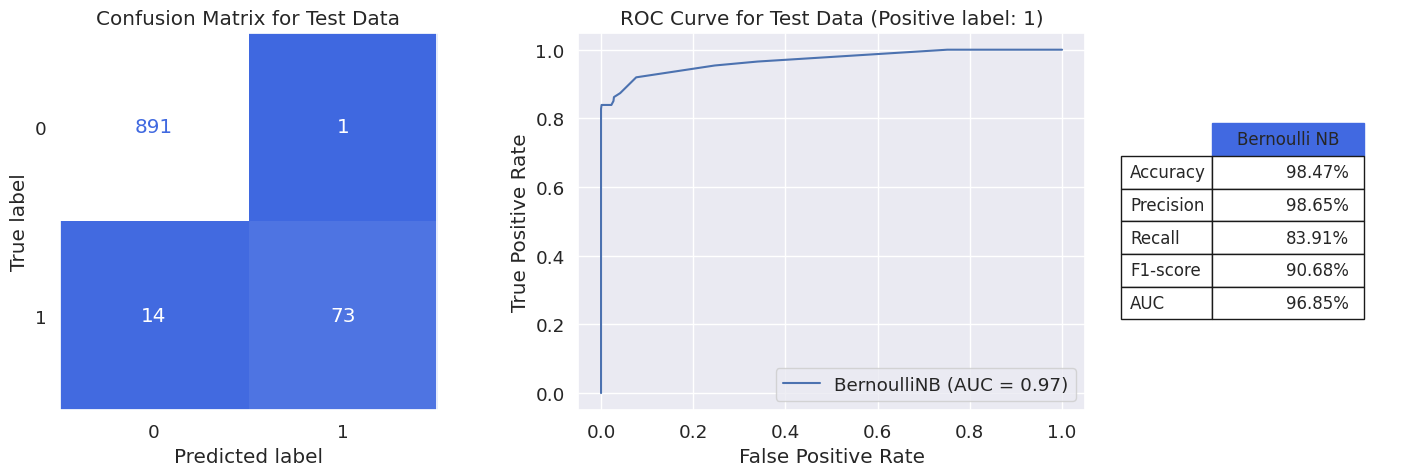

In [56]:
model_evaluation(bnb, X_train, X_test, y_train, y_test, 'Bernoulli NB')

Mendapat peningkatan 5% pada skor f1 dibandingkan dengan model Complement NB. Pada model Bernoulli NB, nilai precision mengalami peningkatan, sedangkan nilai recall mengalami penurunan. Nilai AUC tidak berbeda.

In [57]:
# Save the final performance of Bernoulli Naive Bayes classifier
bnb_result = metrics_calculator(bnb, X_test, y_test, 'Bernoulli Naive Bayes')

## Logistic Regression Model Building

### Scale Data using Standard Scaler

In [58]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [59]:
# Scale the training and test data using the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert training and test sets from numpy array to pandas dataframes
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Hyperparameter grid

In [60]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,0.5,20)]

# Define hyperparameters grid
param_grid = [{'solver':['lbfgs', 'newton-cg', 'sag', 'saga'],
               'penalty':['none'],
               'class_weight':class_weights},

              {'solver':['lbfgs', 'newton-cg', 'sag'],
               'penalty':['l2'],
               'C': np.logspace(-5, 5, 10),
               'class_weight':class_weights},

              {'solver':['liblinear', 'saga'],
               'penalty': ['l1', 'l2'],
               'C': np.logspace(-5, 5, 10),
               'class_weight':class_weights},

              {'solver':['saga'],
               'penalty':['elasticnet'],
               'C': np.logspace(-5, 5, 10),
               'l1_ratio': np.arange(0,1.1,0.1),
               'class_weight':class_weights}]

Berikut ini untuk mencari hyperparameter terbaik dengan kisi hyperparameter yang ditunjuk untuk mengoptimalkan hyperparameter untuk classifier. Itu membandingkan beberapa kombinasi hyperparameter menggunakan GridSearchCV dan cross-validation (StratifiedKFold), lalu memilih kombinasi dengan F1 score terbesar. Dan mengembalikan classifier terbaik dengan hyperparameter yang optimal.

In [61]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train):

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=f1_metric, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    print("Best hyperparameters:\n", clf_grid.best_params_)

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_

In [62]:
# Define the base model
logreg = LogisticRegression(max_iter=1000)

# Call tune_clf_hyperparameters function to find the optimal combination of hyperparameters
logreg_opt = tune_clf_hyperparameters(logreg, param_grid, X_train, y_train)

Best hyperparameters:
 {'C': 3.593813663804626, 'class_weight': {0: 0.34242105263157896, 1: 0.657578947368421}, 'penalty': 'l2', 'solver': 'lbfgs'}


### Feature Subset Selection

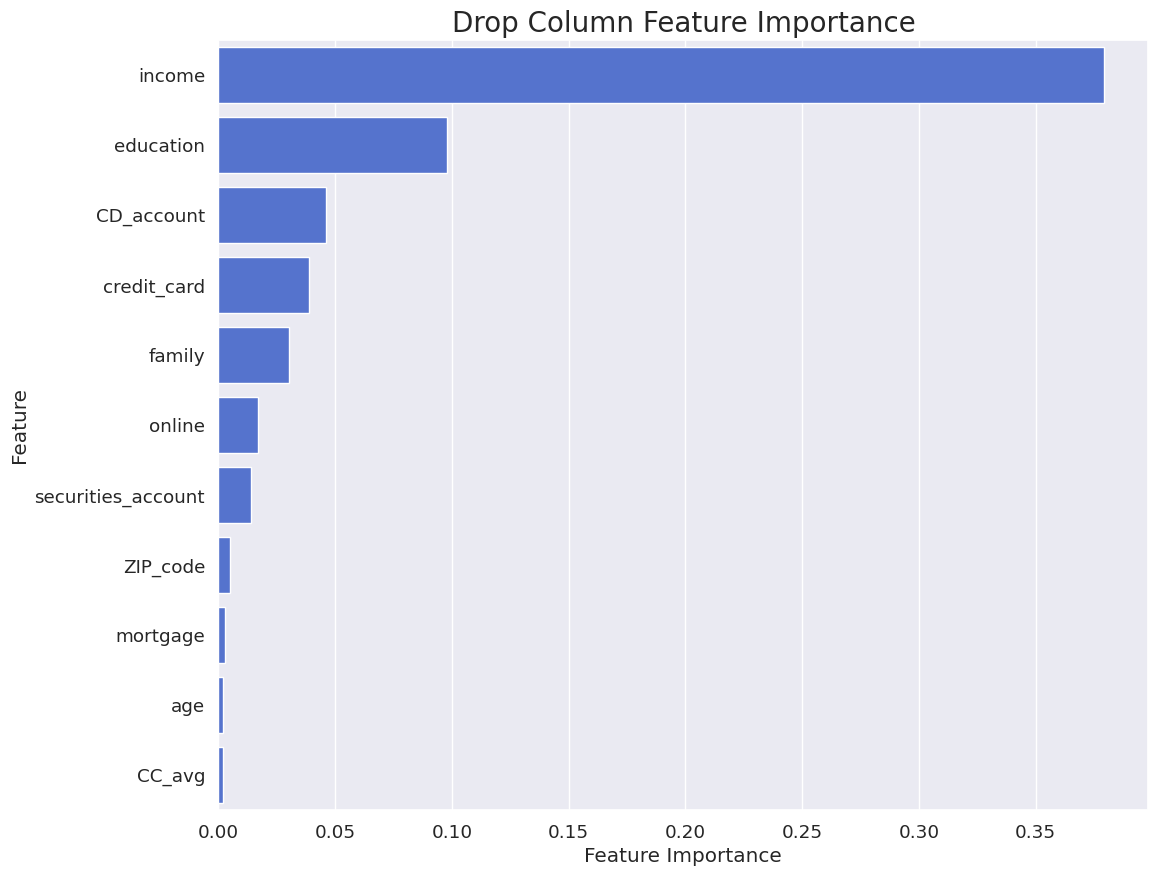

In [63]:
drop_column_importance_plot(logreg_opt, X_train, y_train)

### Model Evaluation


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3569
           1       0.74      0.70      0.72       346

    accuracy                           0.95      3915
   macro avg       0.86      0.84      0.85      3915
weighted avg       0.95      0.95      0.95      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       892
           1       0.67      0.71      0.69        87

    accuracy                           0.94       979
   macro avg       0.82      0.84      0.83       979
weighted avg       0.95      0.94      0.94       979



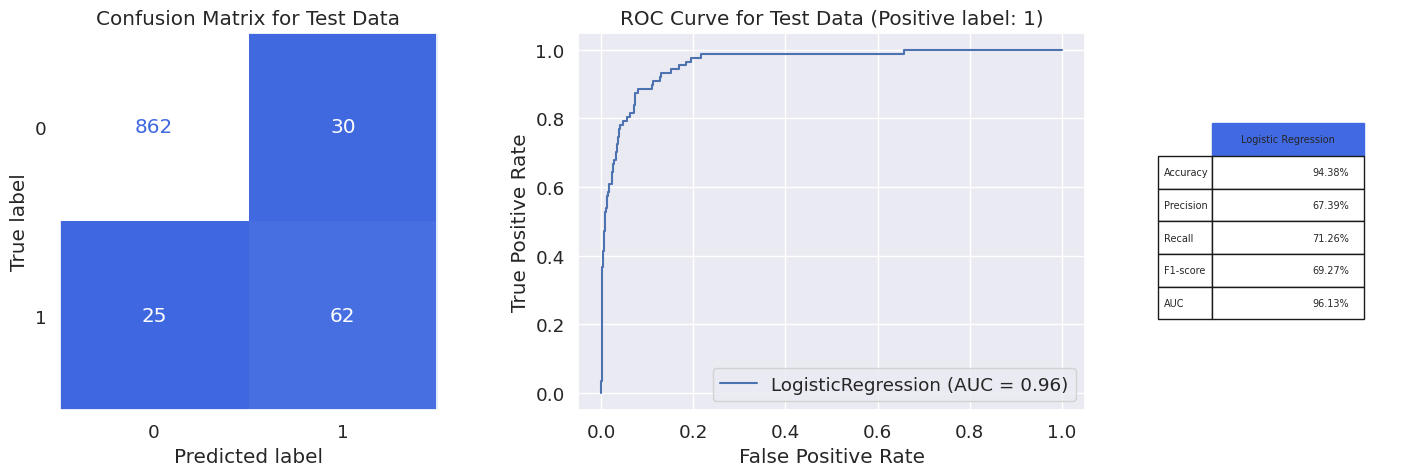

In [64]:
model_evaluation(logreg_opt, X_train, X_test, y_train, y_test, 'Logistic Regression')

Terdapat peningkatan sebesar 10% dalam F1 score dari model logistik dibandingkan dengan model NB Bernoulli.

In [65]:
# Save the final performance of Logistic Regression classifier
logreg_result = metrics_calculator(logreg_opt, X_test, y_test, 'Logistic Regression')

## KNN Model Building

### Scale Data using Standard Scaler

In [66]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Scale the training and test data using the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert training and test sets from numpy array to pandas dataframes
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Hyperparameter Tuning

In [67]:
# Define hyperparameters grid to search
param_grid = [{'n_neighbors': np.arange(2, 30), 'metric': ['euclidean','manhattan'], 'weights': ['uniform']},
              {'n_neighbors': np.arange(2, 30), 'metric': ['minkowski'], 'p': [3,4,5], 'weights': ['uniform']}]

In [68]:
# Create a KNN classifier object
knn = KNeighborsClassifier()

# Find the best classifier with the optimal hyperparameters
knn_opt = tune_clf_hyperparameters(knn, param_grid, X_train, y_train)

Best hyperparameters:
 {'metric': 'minkowski', 'n_neighbors': 3, 'p': 4, 'weights': 'uniform'}


### Feature Subset Selection

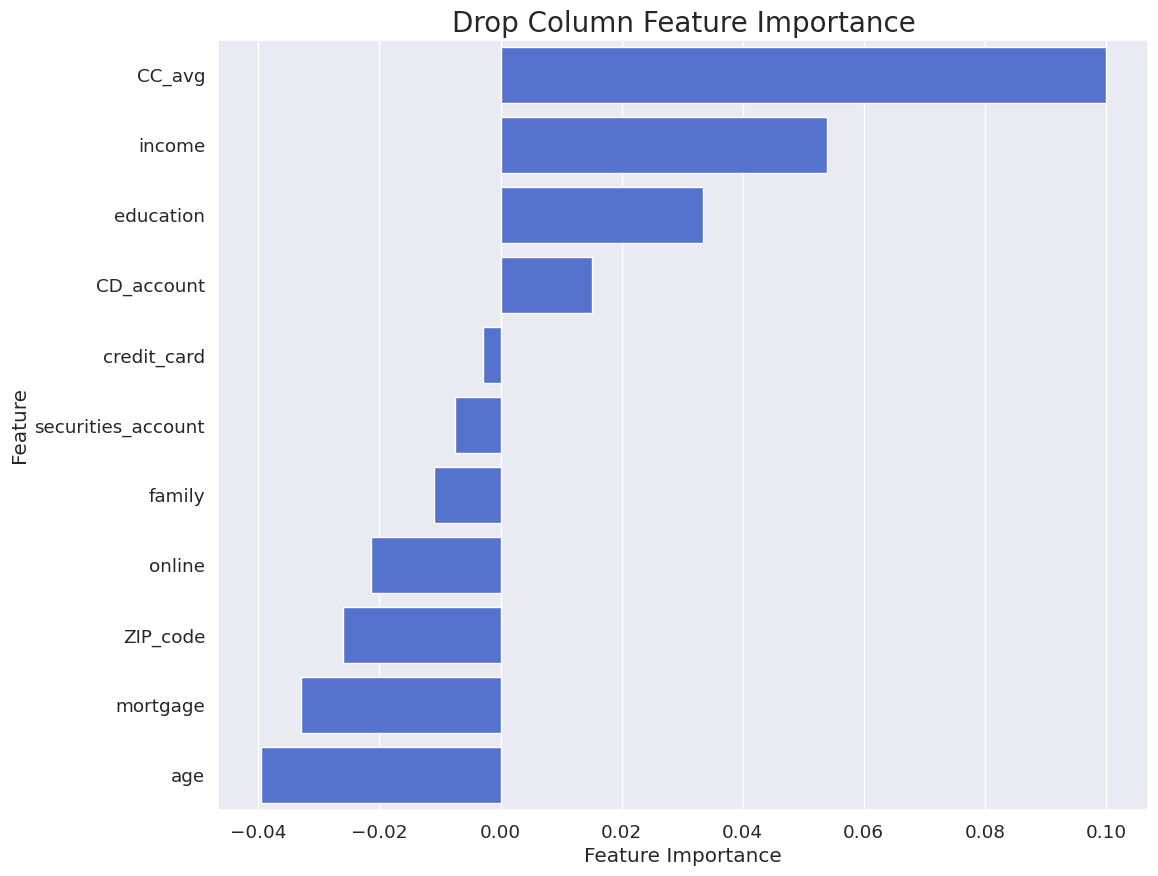

In [69]:
drop_column_importance_plot(knn_opt, X_train, y_train)

In [70]:
# Find Important features with positive feature_importance value
feature_importances = drop_column_importance(knn_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0]['feature']

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [71]:
# Create a KNN classifier object
knn = KNeighborsClassifier()

# Find the best classifier with the optimal hyperparameters
knn_opt = tune_clf_hyperparameters(knn, param_grid, X_train, y_train)

Best hyperparameters:
 {'metric': 'minkowski', 'n_neighbors': 3, 'p': 4, 'weights': 'uniform'}


### Model Evaluation


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3569
           1       1.00      0.95      0.97       346

    accuracy                           1.00      3915
   macro avg       1.00      0.98      0.99      3915
weighted avg       1.00      1.00      1.00      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       892
           1       0.99      0.93      0.96        87

    accuracy                           0.99       979
   macro avg       0.99      0.96      0.98       979
weighted avg       0.99      0.99      0.99       979



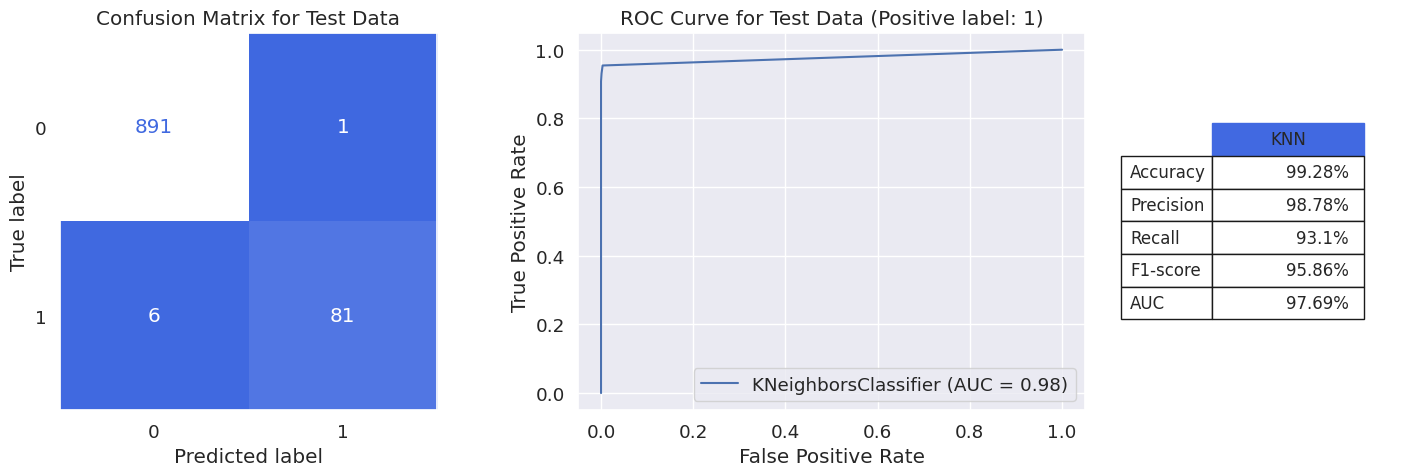

In [72]:
model_evaluation(knn_opt, X_train, X_test, y_train, y_test, 'KNN')

Terlihat F1 Score 91%, precision 95%, dan recall 87% menggunakan KNN

In [73]:
# Save the final performance of KNN classifier
knn_result = metrics_calculator(knn_opt, X_test, y_test, 'K-Nearest Neighbors')

##  SVM Model Building

In [74]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Scale the training and test data using the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert training and test sets from numpy array to pandas dataframes
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Hyperparameter Tuning

In [75]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,0.5,12)]

# Define the hyperparameter grid to search
param_grid = [{'kernel': ['poly'],
               'degree': [2,3,4,5],
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
               'C': [0.01,0.1,1, 10, 100, 1000],
               'class_weight': class_weights},

              {'kernel': ['rbf','sigmoid'],
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
               'C': [0.01,0.1,1, 10, 100, 1000],
               'class_weight': class_weights},

              {'kernel': ['linear'],
               'C': [0.01,0.1,1, 10, 100, 1000],
               'class_weight': class_weights}
             ]

In [76]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,0.5,12)]

# Define the hyperparameter grid to search
param_grid = [{'kernel': ['rbf'],
               'gamma': [0.1, 0.01, 0.001, 0.0001],
               'C': [0.1, 1, 10, 100, 1000],
               'class_weight': class_weights}]

In [77]:
# Create a SVC object
svm = SVC(probability=True, random_state=0)

# Find the best classifier with the optimal hyperparameters
svm_opt = tune_clf_hyperparameters(svm, param_grid, X_train, y_train)

Best hyperparameters:
 {'C': 1000, 'class_weight': {0: 0.4092727272727273, 1: 0.5907272727272728}, 'gamma': 0.01, 'kernel': 'rbf'}


### Feature Subset Selection

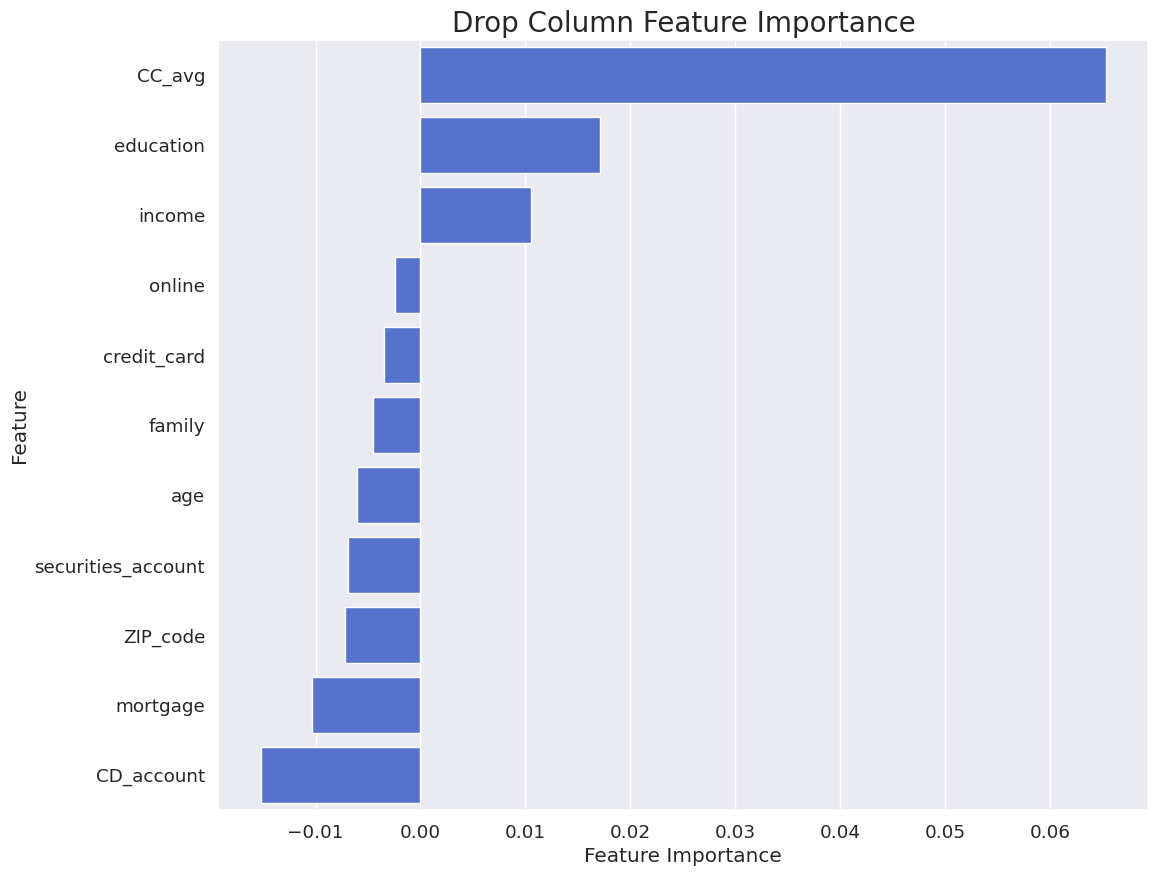

In [78]:
drop_column_importance_plot(svm_opt, X_train, y_train)

In [79]:
# Find Important features with positive feature_importance value
feature_importances = drop_column_importance(svm_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature']  # Threshold value of 0.01

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [80]:
# Create a SVC object
svm = SVC(probability=True, random_state=0)

# Find the best classifier with the optimal hyperparameters
svm_opt = tune_clf_hyperparameters(svm, param_grid, X_train, y_train)

Best hyperparameters:
 {'C': 1000, 'class_weight': {0: 0.1370909090909091, 1: 0.8629090909090908}, 'gamma': 0.1, 'kernel': 'rbf'}


### Model Evaluation


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3569
           1       1.00      0.96      0.98       346

    accuracy                           1.00      3915
   macro avg       1.00      0.98      0.99      3915
weighted avg       1.00      1.00      1.00      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       892
           1       1.00      0.93      0.96        87

    accuracy                           0.99       979
   macro avg       1.00      0.97      0.98       979
weighted avg       0.99      0.99      0.99       979



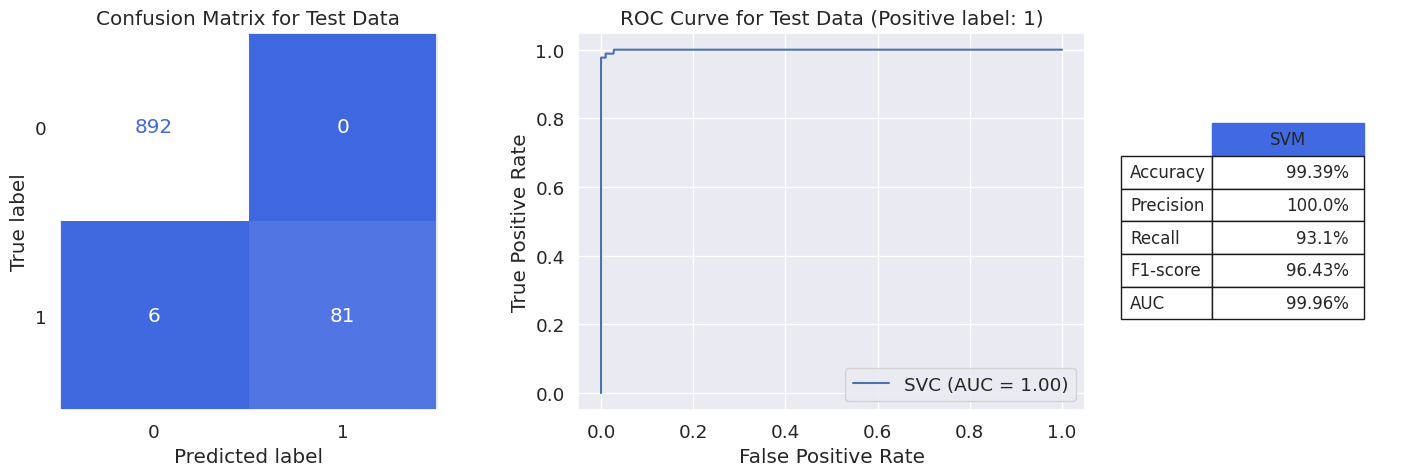

In [81]:
model_evaluation(svm_opt, X_train, X_test, y_train, y_test, 'SVM')

F1 Score memiliki nilai yang sama untuk model SVM yang dibandingkan dengan model KNN, tetapi, nilai AUC telah meningkat menjadi 0,98

In [82]:
# Save the final performance of SVM classifier
svm_result = metrics_calculator(svm_opt, X_test, y_test, 'SVM')

## Decision Tree Model Building

### Hyperparameter Tuning

In [98]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]

# Define the hyperparameter grid
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': np.arange(1, 10),
              'min_samples_split': np.arange(1, 10),
              'min_samples_leaf': np.arange(1, 10),
              'max_features': [None, 'sqrt', 'log2'],
              'class_weight': class_weights}

In [99]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Create a  Decision Tree Classifier object
dt = DecisionTreeClassifier(random_state=0)

# Find the best classifier with the optimal hyperparameters
dt_opt = tune_clf_hyperparameters(dt, param_grid, X_train, y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
72900 fits failed out of a total of 656100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72900 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loc

Best hyperparameters:
 {'class_weight': {0: 0.26389473684210524, 1: 0.7361052631578948}, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Feature Subset Selection

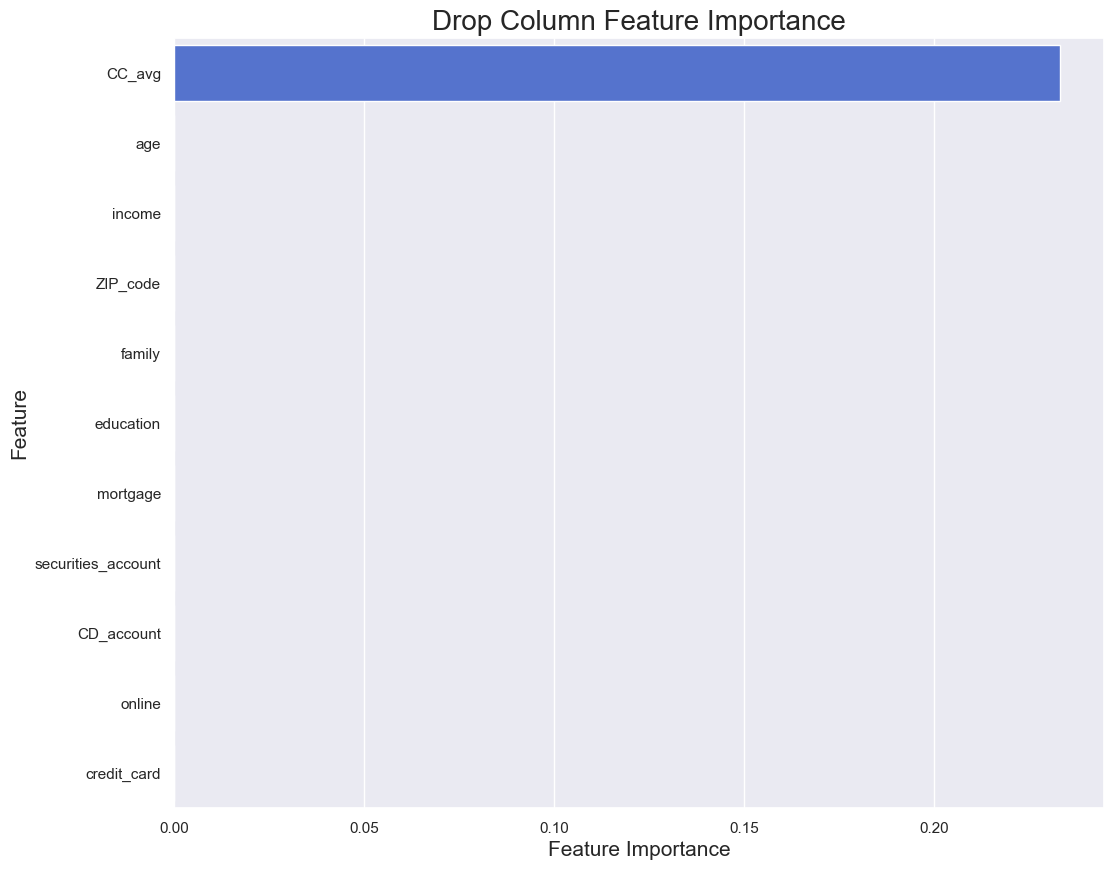

In [100]:
drop_column_importance_plot(dt_opt, X_train, y_train)

In [101]:
# Find Important features with positive feature_importance value
feature_importances = drop_column_importance(dt_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature'] # Threshold value of 0.01

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [102]:
# Create a  Decision Tree Classifier object
dt = DecisionTreeClassifier(random_state=0)

# Find the best classifier with the optimal hyperparameters
dt_opt = tune_clf_hyperparameters(dt, param_grid, X_train, y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
72900 fits failed out of a total of 656100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72900 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loc

Best hyperparameters:
 {'class_weight': {0: 0.05357894736842105, 1: 0.9464210526315789}, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Model Evaluation


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3514
           1       1.00      0.99      0.99       323

    accuracy                           1.00      3837
   macro avg       1.00      0.99      1.00      3837
weighted avg       1.00      1.00      1.00      3837


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       879
           1       1.00      0.96      0.98        81

    accuracy                           1.00       960
   macro avg       1.00      0.98      0.99       960
weighted avg       1.00      1.00      1.00       960



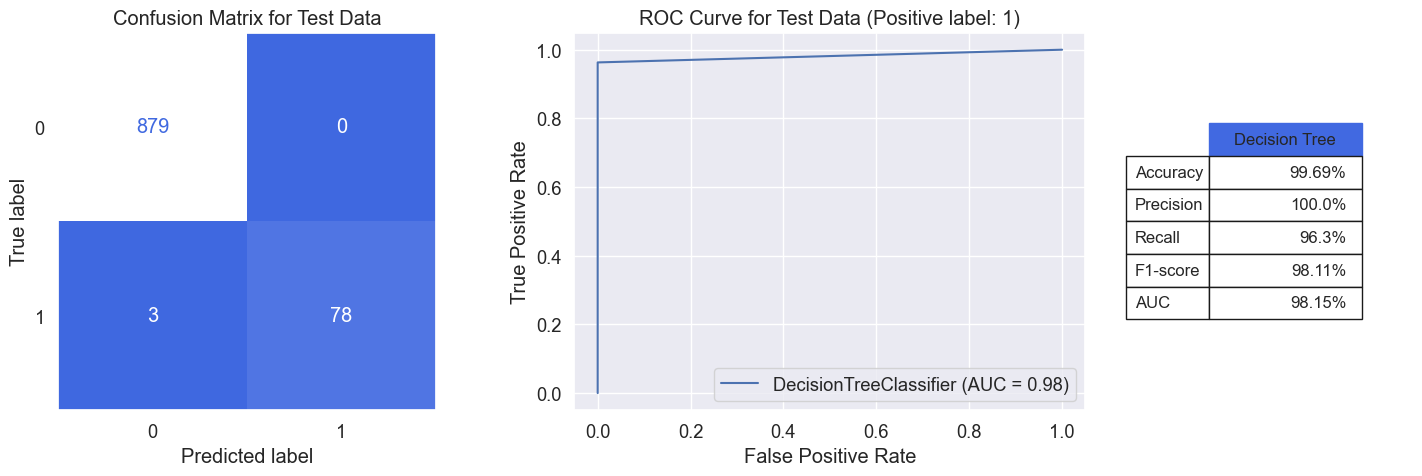

In [118]:
model_evaluation(dt_opt, X_train, X_test, y_train, y_test, 'Decision Tree')

Untuk Decision Tree, F1 score 91%, mirip dengan (KNN & SVM).

In [119]:
# Save the final performance of Decision Tree classifier
dt_result = metrics_calculator(dt_opt, X_test, y_test, 'Decision Tree')

In [127]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=0)

# Melakukan pelatihan model pada data pelatihan
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [128]:
# Load model yang telah dilatih sebelumnya (opsional jika Anda telah melatih model dalam sesi yang sama)
loaded_model = dt

# Lakukan inferensi menggunakan model yang telah dilatih
predicted_classes = loaded_model.predict(X_test)

# Print hasil inferensi
print("Predicted classes:", predicted_classes)

Predicted classes: [0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0

## XGBoost Model Building

### Hyperparameter Tuning

In [90]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Define imbalance ratio
ratio = sum(y_train==0)/sum(y_train==1)

# Define the hyperparameter grid to search
xgb_param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 5, 10],
    'scale_pos_weight': [ratio, ratio*1.3, ratio*1.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'colsample_bylevel': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1],
    'max_delta_step': [0, 1, 2],
    'gamma': [0, 0.1, 1],
    'max_leaf_nodes': [2, 4, 6]
}

In [91]:
# Initialize the XGBoost Classifier
xgb_opt = XGBClassifier(max_depth=5,
                        learning_rate=0.3,
                        n_estimators=200,
                        min_child_weight=1,
                        scale_pos_weight=1.5,
                        colsample_bytree=0.8,
                        gamma=0.1,
                        booster='gbtree',
                        objective='binary:logistic',
                        eval_metric='error',
                        random_state=0)

# Train the XGBoost Classifier
xgb_opt.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

### Feature Subset Selection

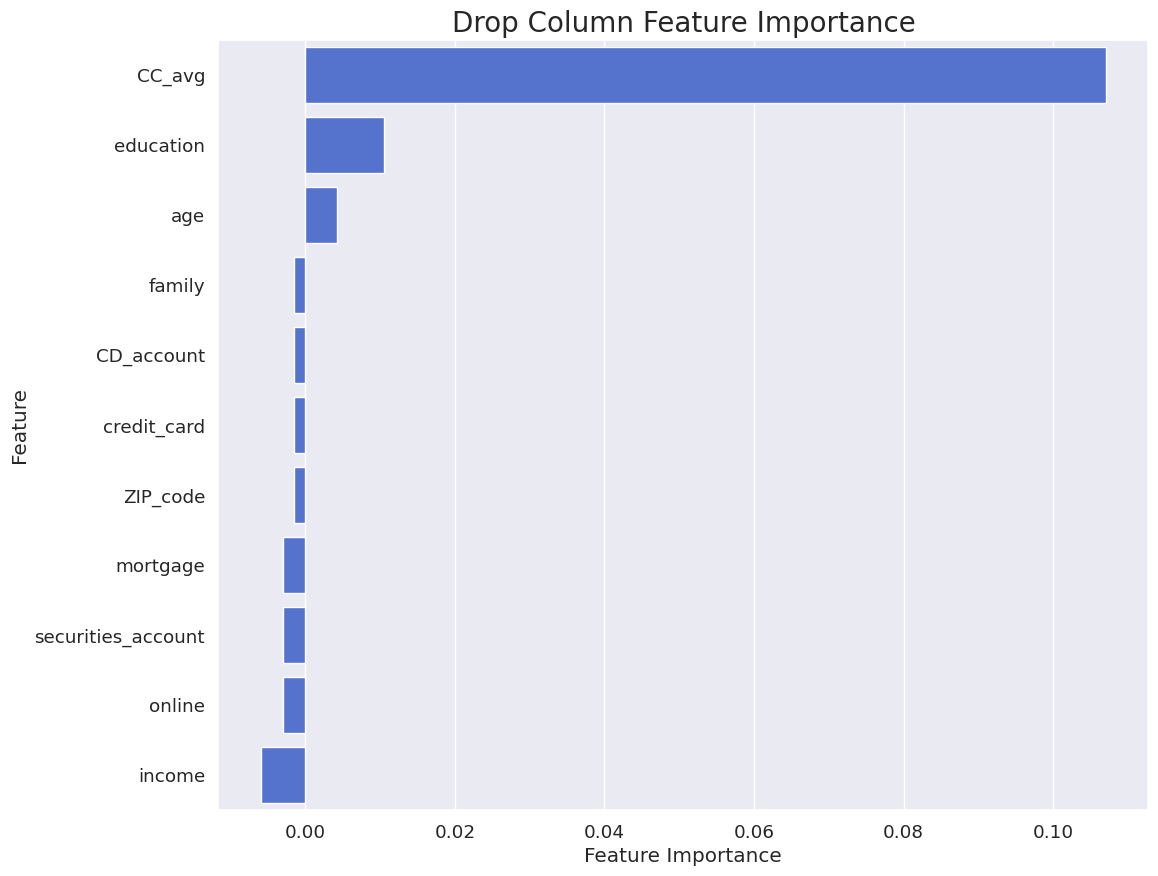

In [92]:
drop_column_importance_plot(xgb_opt, X_train, y_train)

In [93]:
# Find Important features
feature_importances = drop_column_importance(xgb_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.002]['feature'] # Threshold value of 0.002

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [94]:
# Initialize the XGBoost Classifier
xgb = XGBClassifier(max_depth=5,
                    learning_rate=0.3,
                    n_estimators=200,
                    min_child_weight=1,
                    scale_pos_weight=1.5,
                    colsample_bytree=0.8,
                    gamma=0.1,
                    booster='gbtree',
                    objective='binary:logistic',
                    eval_metric='error',
                    random_state=0)

# Train the XGBoost Classifier
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

### Model Evaluation


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3569
           1       1.00      0.98      0.99       346

    accuracy                           1.00      3915
   macro avg       1.00      0.99      1.00      3915
weighted avg       1.00      1.00      1.00      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       892
           1       1.00      0.97      0.98        87

    accuracy                           1.00       979
   macro avg       1.00      0.98      0.99       979
weighted avg       1.00      1.00      1.00       979



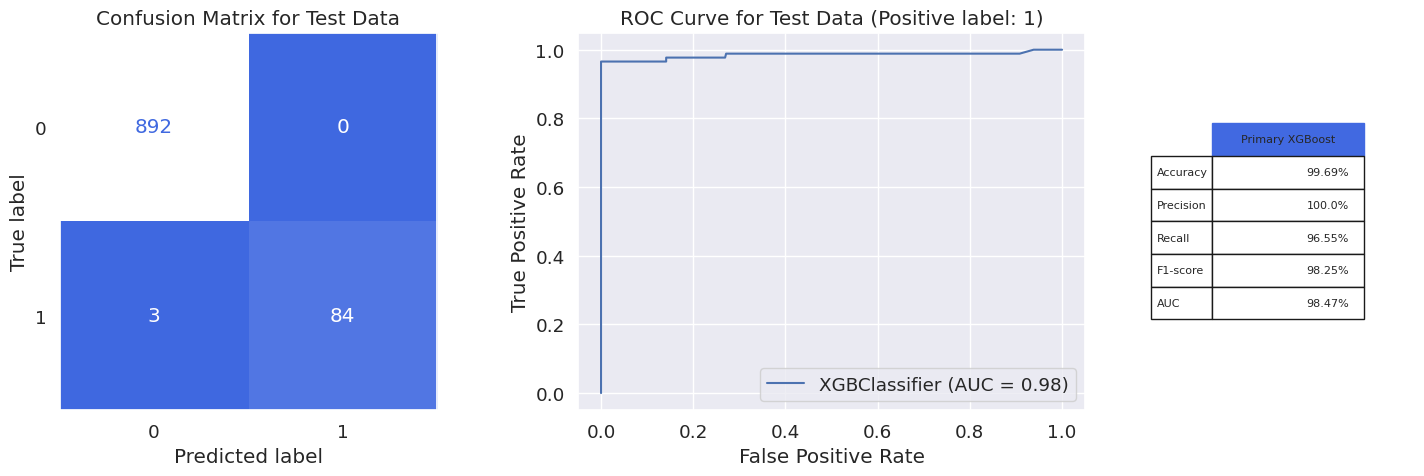

In [95]:
model_evaluation(xgb, X_train, X_test, y_train, y_test, 'Primary XGBoost')

XGBoost terlihat cukup overfitting pada kelas minoritas dan hyperparameter perlu disesuaikan untuk mengurangi varians dan mencegah overfitting.

In [96]:
# Initialize the XGBoost Classifier
xgb_final = XGBClassifier(max_depth=4,
                          learning_rate=0.3,
                          n_estimators=200,
                          min_child_weight=1,
                          scale_pos_weight=1.5,
                          colsample_bytree=0.8,
                          gamma=0.1,
                          booster='gbtree',
                          objective='binary:logistic',
                          eval_metric='error',
                          random_state=0)

# Train the XGBoost Classifier
xgb_final.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3569
           1       1.00      0.98      0.99       346

    accuracy                           1.00      3915
   macro avg       1.00      0.99      1.00      3915
weighted avg       1.00      1.00      1.00      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       892
           1       1.00      0.97      0.98        87

    accuracy                           1.00       979
   macro avg       1.00      0.98      0.99       979
weighted avg       1.00      1.00      1.00       979



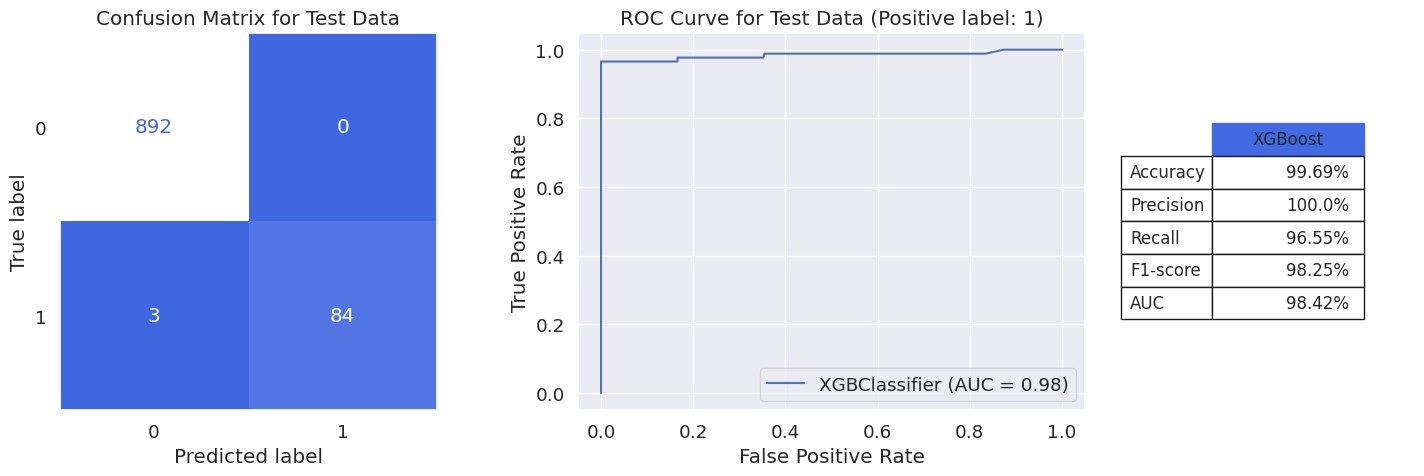

In [97]:
model_evaluation(xgb_final, X_train, X_test, y_train, y_test, 'XGBoost')

Dapat dilihat, F1 score 97%, AUC 99,87%, XGBoost merupakan kinerja terbaik di antara semua klasifikasi yang diuji. Dari 979 nasabah bank, model membuat kesalahan hanya dalam 5 kasus untuk memprediksi apakah nasabah menerima pinjaman atau tidak.

In [98]:
# Save the final performance of XGBoost classifier
xgb_result = metrics_calculator(xgb_final, X_test, y_test, 'XGBoost')

## Model Saving

In [122]:
import joblib

# Simpan model Decision Tree yang telah dioptimalkan
model_filename = 'decision_tree_model.pkl'
joblib.dump(dt, model_filename)
print(f"Model saved as {model_filename}")

Model saved as decision_tree_model.pkl


## Model Inference

In [130]:
import joblib

# Load model yang telah disimpan sebelumnya
loaded_model = joblib.load('decision_tree_model.pkl')

In [131]:
# Create New Data

data_inf = {
    'id': 97,
    'age': 26,
    'experience': 2,
    'income': 70,
    'ZIP_code': 91107,
    'family': 1,
    'CC_avg': 45,
    'education': 2,
    'mortgage': 1,
    'securities_account': 1,
    'CD_account': 1,
    'online':0,
    'credit_card':1
}

data_inf = pd.DataFrame([data_inf])
data_inf

id  age  experience  income  ZIP_code  family  CC_avg  education  mortgage  \
0  97   26           2      70     91107       1      45          2         1   

   securities_account  CD_account  online  credit_card  
0                   1           1       0            1

In [ ]:
# Predict on test data
predicted_class = loaded_model.predict(data_inf)

# Print the predicted classes
print(f"Predicted class: {predicted_class}")

# Conclusion / Overall Analysis

In [99]:
# Concatenate previous classifiers perfermance results into a single dataframe
results = pd.concat([cnb_result, bnb_result, logreg_result, knn_result, svm_result, dt_result, xgb_result], axis=1).T

# Sort the dataframe in descending order based on F1-score values
results.sort_values(by='F1-score', ascending=False, inplace=True)

# Color the F1-score column
results.style.applymap(lambda x: 'background-color: royalblue', subset='F1-score')

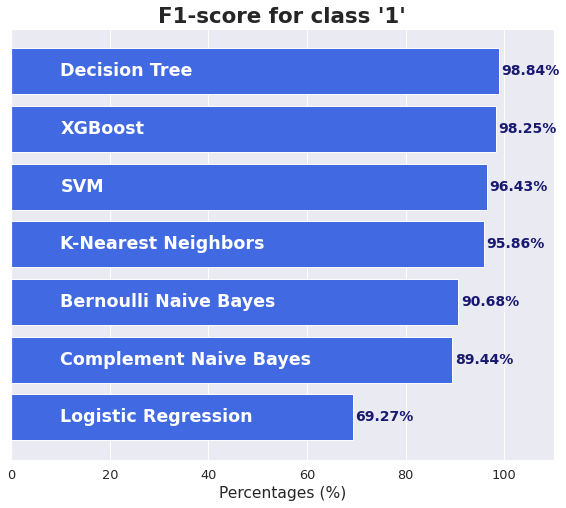

In [100]:
# Prepare values
results.sort_values(by='F1-score', ascending=True, inplace=True)
f1_scores = results['F1-score'].str.strip('%').astype(float)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(10, 8), dpi=70)
ax.barh(results.index, f1_scores, color='royalblue')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(f1_scores, results.index)):
    ax.text(value+0.5, i, f"{value}%", ha='left', va='center', fontweight='bold', color='midnightblue')
    ax.text(10, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=18)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0,110])

# Add title and xlabel
plt.title("F1-score for class '1'", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

__Dari semua pengujian, 'Decision Tree' memiliki performa yang baik untuk mengidentifikasi potensi loan customers:__



* __Accuracy = 99.8%__
* __F1-score = 98.84%__
* __Precision = 100.0%__
* __Recall = 97.7%__
* __AUC = 99.34%__


__Berdasarkan grafik, di antara semua fitur, Education, Income, Family, CCAvg dan CD Account berperan paling penting dalam mengidentifikasi calon nasabah pinjaman.__